# Desafio CodeNation


Objetivo: criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016

## Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import missingno as msno
from scipy import stats

## Leitura do arquivo

In [2]:
df0 = pd.read_csv('testfiles/train.csv')

In [3]:
df = pd.read_csv('testfiles/train.csv')

In [4]:
df.shape

(13730, 167)

In [5]:
pd.set_option("display.max_columns",200)

In [6]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

## Análise dos valores nulos

In [7]:
pd.set_option("display.max_rows",14000)

In [8]:
100*df.isnull().sum()/df.shape[0]

Unnamed: 0                      0.000000
NU_INSCRICAO                    0.000000
NU_ANO                          0.000000
CO_MUNICIPIO_RESIDENCIA         0.000000
NO_MUNICIPIO_RESIDENCIA         0.000000
CO_UF_RESIDENCIA                0.000000
SG_UF_RESIDENCIA                0.000000
NU_IDADE                        0.000000
TP_SEXO                         0.000000
TP_ESTADO_CIVIL                 3.845594
TP_COR_RACA                     0.000000
TP_NACIONALIDADE                0.000000
CO_MUNICIPIO_NASCIMENTO         4.435543
NO_MUNICIPIO_NASCIMENTO         4.435543
CO_UF_NASCIMENTO                4.435543
SG_UF_NASCIMENTO                4.435543
TP_ST_CONCLUSAO                 0.000000
TP_ANO_CONCLUIU                 0.000000
TP_ESCOLA                       0.000000
TP_ENSINO                      68.812819
IN_TREINEIRO                    0.000000
CO_ESCOLA                      68.812819
CO_MUNICIPIO_ESC               68.812819
NO_MUNICIPIO_ESC               68.812819
CO_UF_ESC       

###  Notas com valores nulos

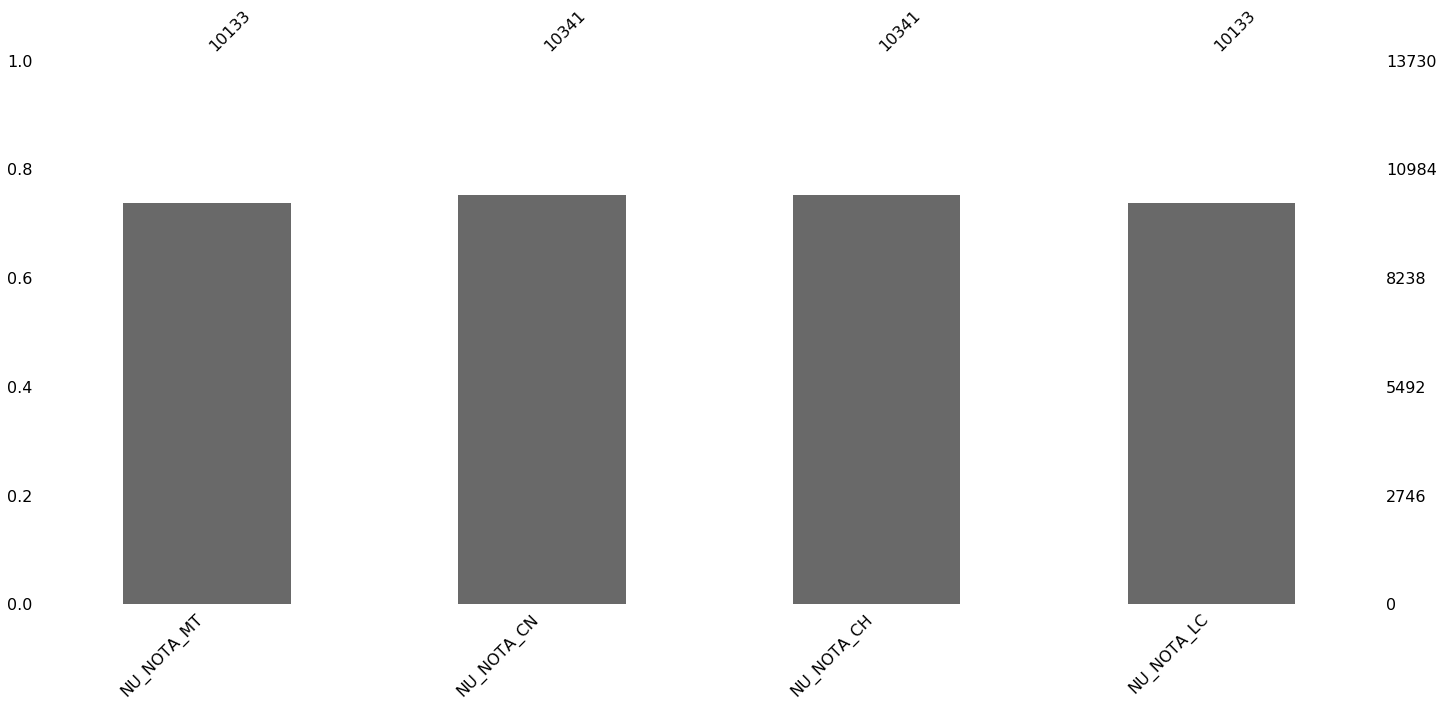

In [9]:
msno.bar(df[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']])


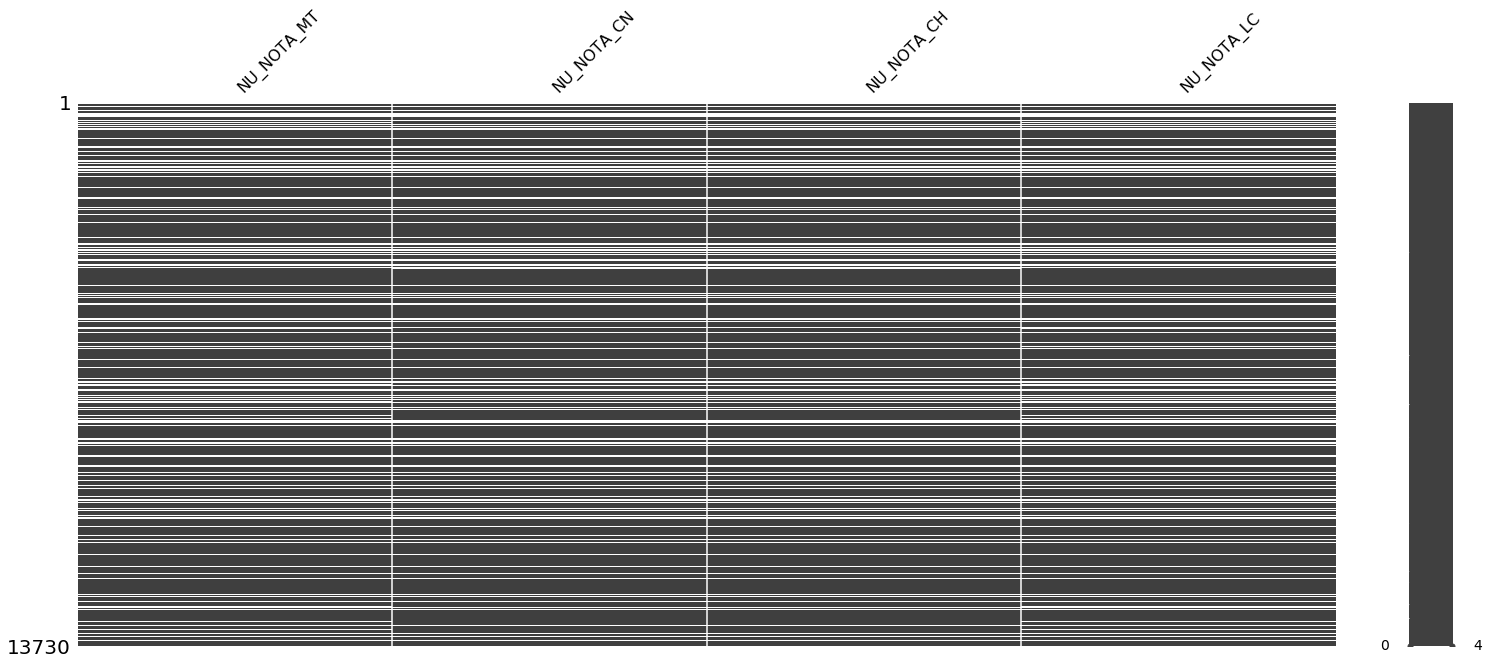

In [10]:
msno.matrix(df[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']])

## Notas em matemática

In [11]:
df['NU_NOTA_MT'][0:5]

0    399.4
1    459.8
2      NaN
3      NaN
4      NaN
Name: NU_NOTA_MT, dtype: float64

In [12]:
df['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

### Notas em matemática com valor zero

In [13]:
# Quantas foram as notas de matemática com valor zero?

In [14]:
df[df['NU_NOTA_MT']==0].shape[0]

10

In [15]:
df[df['NU_NOTA_MT']==0]

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
111,112,6698841b20a8b8109a62ad87c39b775f9587acd0,2016,4305108,Caxias do Sul,43,RS,44,F,0.0,1,1,4322186.0,Tupanci do Sul,43.0,RS,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOL...,43.0,RS,4305108,Caxias do Sul,43,RS,1,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,0.0,0.0,0.0,0.0,.............................................,.............................................,99999............................................,.............................................,1,EADBDCCBADBEBCEBCABDEBEEBECADDBEACACDDBCADCCA,EDDBDDACDCEDDACBBBCBCDCECADBEEBAAADECAECCBCAD,EECDABBECCDAAECBBCBDABBAAEEBBDCBADEBABEADCECEB...,CCEEBCCEBAABDDECADCEECDBCBDBECBADDACEAABDBDAD,6.0,0.0,0.0,0.0,0.0,0.0,0.0,B,B,C,A,3,C,A,B,D,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,C,G,D,1.0,0.0,5.0,5.0,2.0,1,5,0,5,5,5,5,5.0,A,A,A,C,D,A,D,A,A
429,430,a398ec4cdbfc513d15b7b19893373c1a984e3158,2016,3556453,Vargem Grande Paulista,35,SP,17,F,0.0,1,1,3550308.0,São Paulo,35.0,SP,2,0,3,1.0,0,35109307.0,3513009.0,Cotia,35.0,SP,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,3556453,Vargem Grande Paulista,35,SP,2,2,1,1,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,NaN,NaN,0.0,0.0,NaN,NaN,.....99999.......................................,.............................................,0,NaN,NaN,EECDABBECCDAAECBBCBDABBAAEEBBDCBADEBABEADCECEB...,CCEEBCCEBAABDDECADCEECDBCBDBECBADDACEAABDBDAD,1.0,160.0,120.0,120.0,140.0,140.0,680.0,E,D,D,D,5,F,A,D,C,C,A,B,B,B,A,B,A,B,B,B,A,E,B,B,B,

### Histograma de notas na prova de Matemática

/home/adriana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/adriana/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


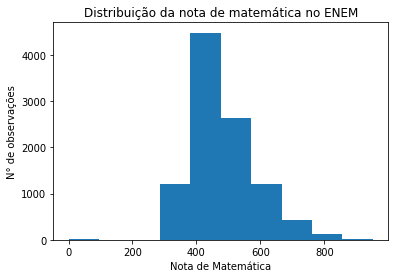

In [16]:
fig,ax=plt.subplots()
ax.hist(df['NU_NOTA_MT'])
ax.set_xlabel('Nota de Matemática')
ax.set_ylabel('N° de observações')
ax.set_title('Distribuição da nota de matemática no ENEM')
plt.show()

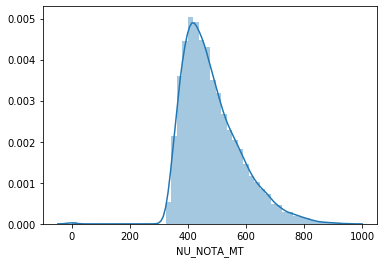

In [17]:
sns.distplot(df['NU_NOTA_MT'])
plt.show()

### Boxplot Notas de Matemática

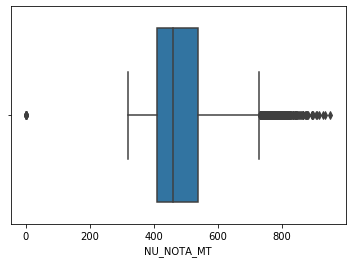

In [18]:
sns.boxplot(df['NU_NOTA_MT'])

## Notas de Matemática x variáveis categóricas

### Notas de matemática e sexo

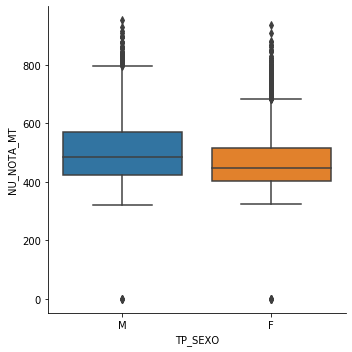

In [19]:
g=sns.catplot(x='TP_SEXO',y='NU_NOTA_MT',data=df, kind='box')
plt.show()

In [20]:
df.groupby('TP_SEXO')['NU_NOTA_MT'].mean()

TP_SEXO
F    468.036671
M    505.881689
Name: NU_NOTA_MT, dtype: float64

In [21]:
df.groupby('TP_SEXO')['NU_NOTA_MT'].std()

TP_SEXO
F     90.833051
M    108.883130
Name: NU_NOTA_MT, dtype: float64

In [22]:
df.groupby('TP_SEXO')['NU_NOTA_MT'].median()

TP_SEXO
F    448.9
M    484.4
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática entre homens e mulheres

In [23]:
t2, p2 = stats.ttest_ind(df[(df['TP_SEXO']=='F')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['TP_SEXO']=='M')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))



t_scipy = -18.083777058211297
p_scipy = 1.6844931913152928e-71


In [24]:
# Há diferença significativa entre as notas de homens e mulheres, pois p<0,05.

### Notas de matemática e etnia

In [25]:
# 0: não declarado
# 1: branca
# 2: preta
# 3: parda
# 4: amarela
# 5: indígena
# 6: não dispões da informação

In [26]:
df['TP_COR_RACA'].value_counts()

3    6693
1    4589
2    1794
4     312
0     241
5     101
Name: TP_COR_RACA, dtype: int64

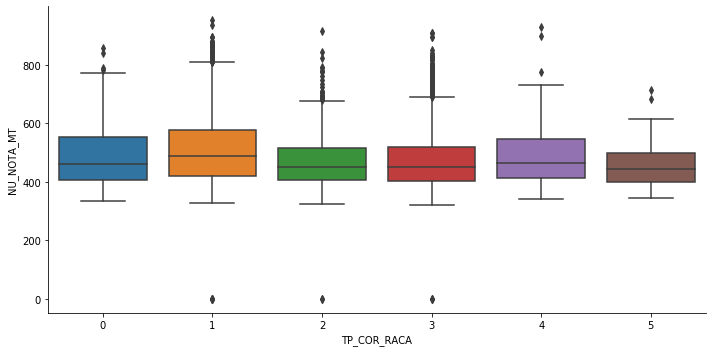

In [27]:
g=sns.catplot(x='TP_COR_RACA',y='NU_NOTA_MT',data=df, kind='box', aspect=2)
plt.show()

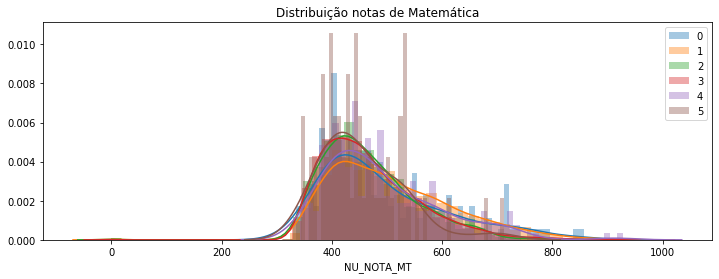

In [28]:
plt.figure(figsize=(12,4))
plt.title('Distribuição notas de Matemática')
sns.distplot(df[df['TP_COR_RACA']==0]['NU_NOTA_MT'], kde=True,bins=50, label='0')
sns.distplot(df[df['TP_COR_RACA']==1]['NU_NOTA_MT'], kde=True,bins=50, label='1')
sns.distplot(df[df['TP_COR_RACA']==2]['NU_NOTA_MT'], kde=True,bins=50, label='2')
sns.distplot(df[df['TP_COR_RACA']==3]['NU_NOTA_MT'], kde=True,bins=50, label='3')
sns.distplot(df[df['TP_COR_RACA']==4]['NU_NOTA_MT'], kde=True,bins=50, label='4')
sns.distplot(df[df['TP_COR_RACA']==5]['NU_NOTA_MT'], kde=True,bins=50, label='5')
plt.legend()
plt.show()

In [29]:
# Média das notas de Matemática por etnia

In [30]:
df.groupby('TP_COR_RACA')['NU_NOTA_MT'].mean()

TP_COR_RACA
0    493.780952
1    507.365215
2    467.069823
3    468.634257
4    490.326316
5    453.979688
Name: NU_NOTA_MT, dtype: float64

In [31]:
# Mediana das notas de Matemática por etnia

In [32]:
df.groupby('TP_COR_RACA')['NU_NOTA_MT'].median()

TP_COR_RACA
0    460.55
1    487.50
2    451.80
3    450.70
4    464.80
5    442.35
Name: NU_NOTA_MT, dtype: float64

In [33]:
# Desvio Padrão das notas de Matemática por etnia

In [34]:
df.groupby('TP_COR_RACA')['NU_NOTA_MT'].std()

TP_COR_RACA
0    112.637744
1    111.866761
2     86.987807
3     89.558678
4    104.088773
5     75.670304
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática entre brancos e indígenas

In [35]:
t2, p2 = stats.ttest_ind(df[(df['TP_COR_RACA']==1)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['TP_COR_RACA']==5)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))



t_scipy = 5.533495889919577
p_scipy = 5.4094883741347e-07


In [36]:
# como p < 0,05, podemos rejeitar a hipótese nula e dizer que as médias das notas de brancos e indígenas são 
# estatísticamente diferentes, com nível de confiança de 95%

### Notas de matemática e Estado de residência

In [37]:
df['SG_UF_RESIDENCIA'].unique()

array(['RS', 'CE', 'RJ', 'AM', 'BA', 'MT', 'PE', 'MG', 'MA', 'RN', 'MS',
       'PR', 'PA', 'DF', 'GO', 'ES', 'SP', 'SC', 'PI', 'TO', 'AP', 'PB',
       'RO', 'SE', 'AL', 'AC', 'RR'], dtype=object)

In [38]:
estados=['RS','PR','SC','RJ','MG','ES','SP','MT','MS','GO','RO','CE','BA','PE','MA','RN','PI','PB','SE','AL',
         'AM','PA','TO','AP','RR','AC','DF']

In [39]:
# Sul:'RS','PR','SC'
# Sudeste: 'RJ','MG','ES','SP'
# Centro-Oeste: 'MT','MS','GO','RO'
# Nordeste: 'CE','BA','PE','MA','RN','PI','PB','SE','AL'
# Norte: 'AM','PA','TO','AP','RR','AC'
#'DF'

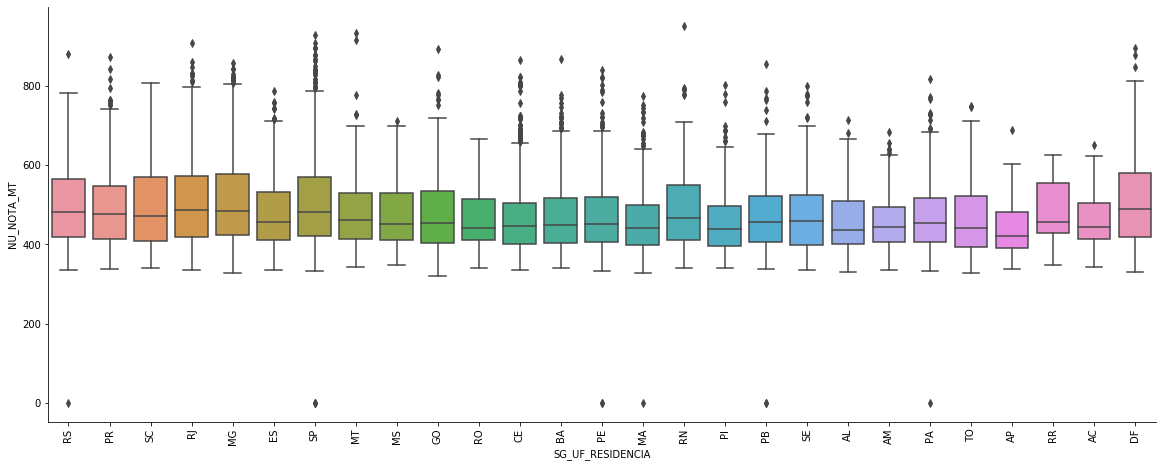

In [40]:
g=sns.catplot(x='SG_UF_RESIDENCIA',y='NU_NOTA_MT',data=df, kind='box',height=6.5, aspect=2.5,order=estados)

plt.xticks(rotation=90)
plt.show()

In [41]:
df.groupby('SG_UF_RESIDENCIA')['NU_NOTA_MT'].mean()

SG_UF_RESIDENCIA
AC    461.818750
AL    460.152976
AM    459.893567
AP    444.869231
BA    469.348872
CE    462.602915
DF    510.527160
ES    480.883412
GO    476.934031
MA    455.968534
MG    506.948713
MS    473.285385
MT    480.622222
PA    466.335421
PB    469.906375
PE    469.443469
PI    457.378541
PR    490.541333
RJ    510.125693
RN    491.767914
RO    466.239506
RR    486.386364
RS    494.639418
SC    494.447368
SE    478.811111
SP    503.945071
TO    464.550000
Name: NU_NOTA_MT, dtype: float64

In [42]:
df.groupby('SG_UF_RESIDENCIA')['NU_NOTA_MT'].mean().max()

510.5271604938276

In [43]:
df.groupby('SG_UF_RESIDENCIA')['NU_NOTA_MT'].mean().min()

444.86923076923085

In [44]:
# UF com maior média: DF, menor média:Amapá (AP)

In [45]:
df.groupby('SG_UF_RESIDENCIA')['NU_NOTA_MT'].std()

SG_UF_RESIDENCIA
AC     73.649274
AL     80.505290
AM     72.483010
AP     76.162078
BA     89.232942
CE     84.646421
DF    119.453975
ES     93.826059
GO     99.733853
MA     82.846055
MG    108.573315
MS     84.549374
MT     96.647759
PA     87.591208
PB     98.108996
PE     98.108780
PI     86.029359
PR     98.764669
RJ    114.409186
RN    108.686558
RO     81.134180
RR     82.633985
RS     98.961349
SC    101.438724
SE    100.443996
SP    110.839465
TO     94.406198
Name: NU_NOTA_MT, dtype: float64

In [46]:
df.groupby('SG_UF_RESIDENCIA')['NU_NOTA_MT'].median()

SG_UF_RESIDENCIA
AC    443.75
AL    435.85
AM    445.00
AP    421.05
BA    449.60
CE    446.45
DF    489.35
ES    457.00
GO    453.30
MA    441.80
MG    485.10
MS    451.85
MT    461.60
PA    454.10
PB    456.40
PE    451.80
PI    438.00
PR    475.55
RJ    487.10
RN    466.10
RO    441.50
RR    456.95
RS    482.60
SC    472.20
SE    458.40
SP    480.65
TO    441.25
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática no DF e AP

In [47]:
t2, p2 = stats.ttest_ind(df[(df['SG_UF_RESIDENCIA']=='AP')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['SG_UF_RESIDENCIA']=='DF')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))



t_scipy = -4.6469823171940146
p_scipy = 7.850275027434799e-06


### Notas de matemática e nacionalidade

In [48]:
# 0: não declarado
# 1: brasileiro
# 2: brasileiro naturalizado
# 3: estrangeiro
# 4: brasileiro nato, nascido no exterior

In [49]:
df['TP_NACIONALIDADE'].value_counts()

1    13121
2      548
4       40
0       13
3        8
Name: TP_NACIONALIDADE, dtype: int64

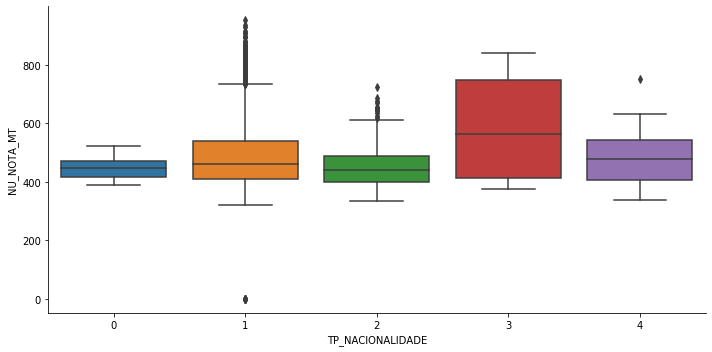

In [50]:
g=sns.catplot(x='TP_NACIONALIDADE',y='NU_NOTA_MT',data=df, kind='box', aspect=2)
plt.show()

In [51]:
# Média das notas de Matemática por nacionalidade

In [52]:
df.groupby('TP_NACIONALIDADE')['NU_NOTA_MT'].mean()

TP_NACIONALIDADE
0    447.990000
1    483.581353
2    452.404959
3    585.716667
4    486.219355
Name: NU_NOTA_MT, dtype: float64

In [53]:
# Desvio Padrão das notas de Matemática por nacionalidade

In [54]:
df.groupby('TP_NACIONALIDADE')['NU_NOTA_MT'].std()

TP_NACIONALIDADE
0     39.930981
1    100.445369
2     74.100696
3    199.934413
4     93.475531
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática entre brasileiros e estrangeiros

In [55]:
t2, p2 = stats.ttest_ind(df[(df['TP_NACIONALIDADE']==1)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['TP_NACIONALIDADE']==3)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))



t_scipy = -1.2512099189921364
p_scipy = 0.2661939912266435


In [56]:
# como p > 0,05, aceitamos a hipótese nula, que considera que a média de nota de brasileiros e estrangeiros é 
# estatisticamente equivalente.

In [57]:
# Não utilizarei essa variável no modelo.

### Notas de matemática e situação de conclusão do ensino médio

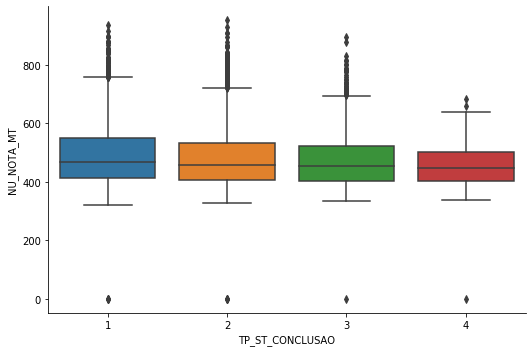

In [58]:
g=sns.catplot(x='TP_ST_CONCLUSAO',y='NU_NOTA_MT',data=df, kind='box', aspect=1.5)
plt.show()

In [59]:
# Média das notas de Matemática por situação de conclusão do ensino médio

In [60]:
df.groupby('TP_ST_CONCLUSAO')['NU_NOTA_MT'].mean()

TP_ST_CONCLUSAO
1    491.261086
2    479.927747
3    470.792075
4    458.248276
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática entre quem já concluiu e quem não concluiu o ensino médio

In [61]:
t2, p2 = stats.ttest_ind(df[(df['TP_ST_CONCLUSAO']==1)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['TP_ST_CONCLUSAO']==4)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))



t_scipy = 7.020387394389154
p_scipy = 1.0760770454438103e-11


### Notas de matemática e ano de conclusão do ensino médio

In [62]:
df[df['TP_ANO_CONCLUIU']==0]['TP_ST_CONCLUSAO'].value_counts()

2    4283
3    2306
4     617
Name: TP_ST_CONCLUSAO, dtype: int64

In [63]:
# Se o ano de conclusão não foi informado, significa que a pessoa não conclui ainda 

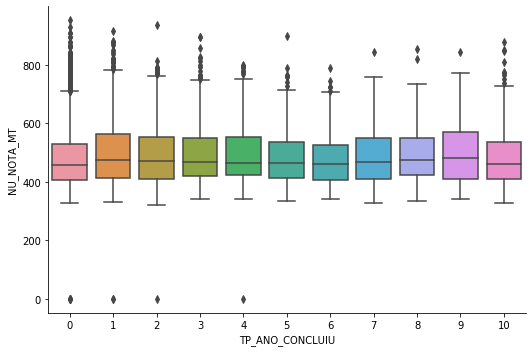

In [64]:
g=sns.catplot(x='TP_ANO_CONCLUIU',y='NU_NOTA_MT',data=df, kind='box', aspect=1.5)
plt.show()

In [65]:
# Média das notas de Matemática por ano de conclusão do ensino médio

In [66]:
df.groupby('TP_ANO_CONCLUIU')['NU_NOTA_MT'].mean()

TP_ANO_CONCLUIU
0     475.911547
1     496.717042
2     492.499741
3     495.384569
4     492.910028
5     485.460870
6     478.085714
7     487.913636
8     496.804800
9     497.251402
10    480.041842
Name: NU_NOTA_MT, dtype: float64

In [67]:
df.groupby('TP_ANO_CONCLUIU')['NU_NOTA_MT'].median()

TP_ANO_CONCLUIU
0     456.30
1     473.75
2     471.50
3     468.00
4     465.30
5     463.85
6     462.10
7     467.00
8     476.10
9     482.10
10    460.00
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática em diferentes anos de conclusão

In [68]:
t2, p2 = stats.ttest_ind(df[(df['TP_ANO_CONCLUIU']==1)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['TP_ANO_CONCLUIU']==10)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))



t_scipy = 3.3725430819408415
p_scipy = 0.0007649356305840543


### Notas de matemática e tipo de escola

In [69]:
df['TP_ESCOLA'].value_counts(dropna=False)

1    9447
2    3713
3     569
4       1
Name: TP_ESCOLA, dtype: int64

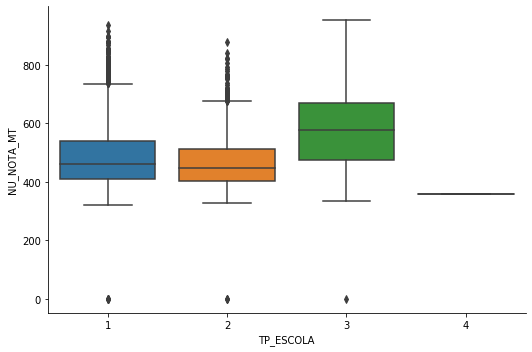

In [70]:
g=sns.catplot(x='TP_ESCOLA',y='NU_NOTA_MT',data=df, kind='box', aspect=1.5)
plt.show()

In [71]:
# Média das notas de Matemática por tipo de escola

In [72]:
df.groupby('TP_ESCOLA')['NU_NOTA_MT'].mean()

TP_ESCOLA
1    483.938780
2    463.025799
3    576.728413
4    359.300000
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática em diferentes anos de conclusão

In [73]:
t2, p2 = stats.ttest_ind(df[(df['TP_ESCOLA']==3)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['TP_ESCOLA']==2)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = 19.587522257050033
p_scipy = 8.118136994280153e-67


### Notas de matemática e treineiro

In [74]:
df['IN_TREINEIRO'].value_counts(dropna=False)

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

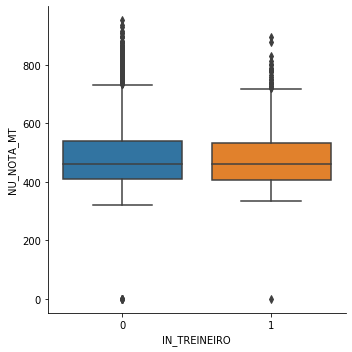

In [75]:
g=sns.catplot(x='IN_TREINEIRO',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

In [76]:
# Média das notas de Matemática entre treineiros e não treineiros

In [77]:
df.groupby('IN_TREINEIRO')['NU_NOTA_MT'].mean()

IN_TREINEIRO
0    483.427086
1    477.171163
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática em diferentes anos de conclusão

In [78]:
t2, p2 = stats.ttest_ind(df[(df['IN_TREINEIRO']==0)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['IN_TREINEIRO']==1)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = 2.369716191393585
p_scipy = 0.017889019071194726


### Notas de matemática e baixa visão

In [79]:
df['IN_BAIXA_VISAO'].value_counts(dropna=False)

0    13713
1       17
Name: IN_BAIXA_VISAO, dtype: int64

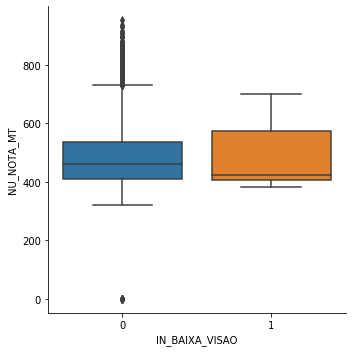

In [80]:
g=sns.catplot(x='IN_BAIXA_VISAO',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

In [81]:
# Média das notas de Matemática pessoas com baixa visão

In [82]:
df.groupby('IN_BAIXA_VISAO')['NU_NOTA_MT'].mean()

IN_BAIXA_VISAO
0    482.495673
1    484.572727
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática em diferentes anos de conclusão

In [83]:
t2, p2 = stats.ttest_ind(df[(df['IN_BAIXA_VISAO']==0)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['IN_BAIXA_VISAO']==1)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = -0.061892019191405606
p_scipy = 0.9518662955883994


### Notas de matemática e cegueira

In [84]:
df['IN_CEGUEIRA'].value_counts(dropna=False)

0    13730
Name: IN_CEGUEIRA, dtype: int64

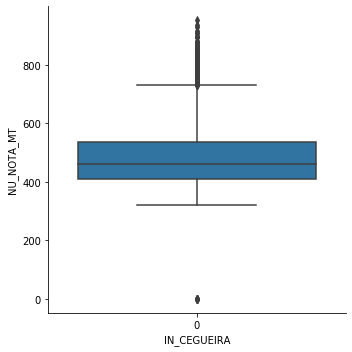

In [85]:
g=sns.catplot(x='IN_CEGUEIRA',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

In [86]:
# Como no nosso dataset não pessoas com cegueira, não é possível avaliar o efeito dessa variável

### Notas de matemática e surdez

In [87]:
df['IN_SURDEZ'].value_counts(dropna=False)

0    13725
1        5
Name: IN_SURDEZ, dtype: int64

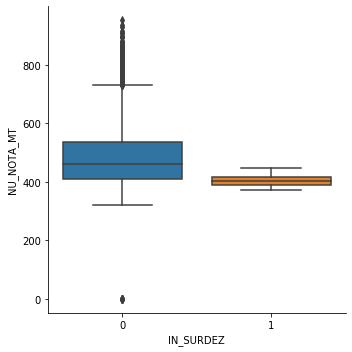

In [88]:
g=sns.catplot(x='IN_SURDEZ',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

In [89]:
# Média das notas de Matemática pessoas com baixa visão

In [90]:
df.groupby('IN_SURDEZ')['NU_NOTA_MT'].mean()

IN_SURDEZ
0    482.528177
1    405.900000
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática em diferentes anos de conclusão

In [91]:
t2, p2 = stats.ttest_ind(df[(df['IN_SURDEZ']==0)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['IN_SURDEZ']==1)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = 5.007711186439456
p_scipy = 0.015021572308618298


### Notas de matemática e dislexia

In [92]:
df['IN_DISLEXIA'].value_counts(dropna=False)

0    13729
1        1
Name: IN_DISLEXIA, dtype: int64

In [93]:
# Como só há um aluno com dislexia, irei desconsiderar essa variável no modelo

### Notas de matemática e discalculia

In [94]:
df['IN_DISCALCULIA'].value_counts(dropna=False)

0    13729
1        1
Name: IN_DISCALCULIA, dtype: int64

In [95]:
# Como só há um aluno com discalculia, irei desconsiderar essa variável no modelo

### Notas de matemática e sabatista

In [96]:
df['IN_SABATISTA'].value_counts(dropna=False)

0    13597
1      133
Name: IN_SABATISTA, dtype: int64

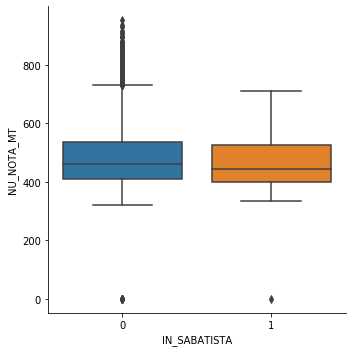

In [97]:
g=sns.catplot(x='IN_SABATISTA',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

In [98]:
# Média das notas de Matemática de sabatistas

In [99]:
df.groupby('IN_SABATISTA')['NU_NOTA_MT'].mean()

IN_SABATISTA
0    482.661956
1    466.041000
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática em diferentes anos de conclusão

In [100]:
t2, p2 = stats.ttest_ind(df[(df['IN_SABATISTA']==0)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['IN_SABATISTA']==1)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = 1.6204001034292006
p_scipy = 0.10826775023026507


### Notas de matemática e gestante

In [101]:
df['IN_GESTANTE'].value_counts(dropna=False)

0    13717
1       13
Name: IN_GESTANTE, dtype: int64

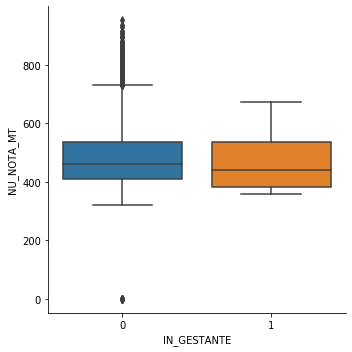

In [102]:
g=sns.catplot(x='IN_GESTANTE',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

In [103]:
# Média das notas de Matemática de gestantes

In [104]:
df.groupby('IN_GESTANTE')['NU_NOTA_MT'].mean()

IN_GESTANTE
0    482.499803
1    477.750000
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática em diferentes anos de conclusão

In [105]:
t2, p2 = stats.ttest_ind(df[(df['IN_GESTANTE']==0)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['IN_GESTANTE']==1)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = 0.06695181108586576
p_scipy = 0.9508308044013735


### Notas de matemática e idosos

In [106]:
df['IN_IDOSO'].value_counts(dropna=False)

0    13728
1        2
Name: IN_IDOSO, dtype: int64

In [107]:
# Temos apenas 2 idosos na amostra. Não incluirei essa variável no modelo.

### Notas de matemática e TP_PRESENCA_CH

In [108]:
df['TP_PRESENCA_CH'].value_counts(dropna=False)

1    10341
0     3380
2        9
Name: TP_PRESENCA_CH, dtype: int64

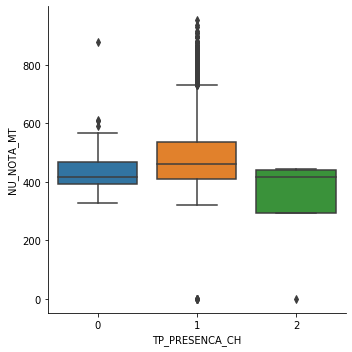

In [109]:
g=sns.catplot(x='TP_PRESENCA_CH',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

In [110]:
# Média das notas de Matemática de acordo com a presença na prova de ciências humanas

In [111]:
df.groupby('TP_PRESENCA_CH')['NU_NOTA_MT'].mean()

TP_PRESENCA_CH
0    455.378125
1    482.648638
2    319.025000
Name: NU_NOTA_MT, dtype: float64

In [112]:
df[df['TP_PRESENCA_CH']==0]['NU_NOTA_MT'].describe()

count     32.000000
mean     455.378125
std      109.761438
min      329.000000
25%      393.225000
50%      415.750000
75%      468.250000
max      878.300000
Name: NU_NOTA_MT, dtype: float64

In [113]:
df[(df['TP_PRESENCA_CH']==0) &(df['NU_NOTA_MT']>600)]

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
5340,764,4ef0994edd6ca6a73b165b0d0d4cab2dbe91b51b,2016,3550308,São Paulo,35,SP,16,F,0.0,3,1,3550308.0,São Paulo,35.0,SP,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,3550308,São Paulo,35,SP,0,0,1,1,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,NaN,NaN,579.3,608.3,NaN,NaN,ECDAA99999CAAACBBCEDAABBCEDBEEECAEBEDBCAEBCBCB...,EBDECACBBAEDBCAEBDCABDDBCADBEABDEDCADEBCEABED,0,NaN,NaN,EECDABBECCDAAECBBCBDABBAAEEBBDCBADEBABEADCECEB...,CCEEBCCEBAABDDECADCEECDBCBDBECBADDACEAABDBDAD,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,D,B,B,3,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,C,B,B,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,5,5,4,5,NaN,A,A,A,A,C,A,A,A,A
12628,3485,4a1ca79e1ae1cca060e2565174135a0e5e3d9dff,2016,3535309,Palmital,35,SP,17,M,0.0,1,1,3523909.0,Itu,35.0,SP,2,0,2,1.0,0,35337687.0,3535309.0,Palmital,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,3504008,Assis,35,SP,0,0,1,1,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,NaN,NaN,576.7,610.3,NaN,NaN,ADEAA99999BEBBEEAACDBCEACEEAEBCDDAABADCCBBABBB...,CCEDCBCBECBCCEBDECEBACDDACADAAACBDCBDDCECCBDC,0,NaN,NaN,EDECACCBBEDEBBBDABCBBCCEBADCEBAAEAAEDCBCABDBAB...,CEECDBDADEBCCEBABECEACBDABDBDDABDDECADCCEACBA,1.0,80.0,120.0,80.0,80.0,80.0,440.0,E,E,D,D,3,H,A,C,D,C,B,B,A,B,A,B,A,B,C,B,B,D,B,B,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,3,5,5,4,5,NaN,A,A,A,A,B,A,A,A,A
12652,3509,193e6d2b72cadd3ac162fb475de549c4ff127609,2016,3543402,Ribeirão Preto,35,SP,38,M,1.0,1,1,3543402.0,Ribeirão Preto,35.0,SP,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [114]:
# Posteriormente irei exluir do dataset os dados de alunos que faltaram na prova de ciências humanas e tiveram
# nota acima de 600 em matemática (outliers)

### Notas de matemática e TP_PRESENCA_CN

In [115]:
df['TP_PRESENCA_CN'].value_counts(dropna=False)

1    10341
0     3380
2        9
Name: TP_PRESENCA_CN, dtype: int64

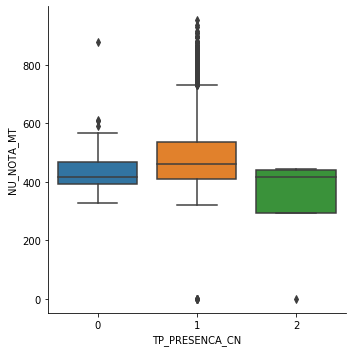

In [116]:
g=sns.catplot(x='TP_PRESENCA_CN',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

In [117]:
# Média das notas de Matemática de acordo com a presença na prova de ciências naturais

In [118]:
df.groupby('TP_PRESENCA_CN')['NU_NOTA_MT'].mean()

TP_PRESENCA_CN
0    455.378125
1    482.648638
2    319.025000
Name: NU_NOTA_MT, dtype: float64

In [119]:
df[df['TP_PRESENCA_CN']==0]['NU_NOTA_MT'].describe()

count     32.000000
mean     455.378125
std      109.761438
min      329.000000
25%      393.225000
50%      415.750000
75%      468.250000
max      878.300000
Name: NU_NOTA_MT, dtype: float64

In [120]:
df[(df['TP_PRESENCA_CN']==0) &(df['NU_NOTA_MT']>600)]

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
5340,764,4ef0994edd6ca6a73b165b0d0d4cab2dbe91b51b,2016,3550308,São Paulo,35,SP,16,F,0.0,3,1,3550308.0,São Paulo,35.0,SP,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,3550308,São Paulo,35,SP,0,0,1,1,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,NaN,NaN,579.3,608.3,NaN,NaN,ECDAA99999CAAACBBCEDAABBCEDBEEECAEBEDBCAEBCBCB...,EBDECACBBAEDBCAEBDCABDDBCADBEABDEDCADEBCEABED,0,NaN,NaN,EECDABBECCDAAECBBCBDABBAAEEBBDCBADEBABEADCECEB...,CCEEBCCEBAABDDECADCEECDBCBDBECBADDACEAABDBDAD,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,D,B,B,3,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,C,B,B,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,5,5,4,5,NaN,A,A,A,A,C,A,A,A,A
12628,3485,4a1ca79e1ae1cca060e2565174135a0e5e3d9dff,2016,3535309,Palmital,35,SP,17,M,0.0,1,1,3523909.0,Itu,35.0,SP,2,0,2,1.0,0,35337687.0,3535309.0,Palmital,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,3504008,Assis,35,SP,0,0,1,1,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,NaN,NaN,576.7,610.3,NaN,NaN,ADEAA99999BEBBEEAACDBCEACEEAEBCDDAABADCCBBABBB...,CCEDCBCBECBCCEBDECEBACDDACADAAACBDCBDDCECCBDC,0,NaN,NaN,EDECACCBBEDEBBBDABCBBCCEBADCEBAAEAAEDCBCABDBAB...,CEECDBDADEBCCEBABECEACBDABDBDDABDDECADCCEACBA,1.0,80.0,120.0,80.0,80.0,80.0,440.0,E,E,D,D,3,H,A,C,D,C,B,B,A,B,A,B,A,B,C,B,B,D,B,B,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,3,5,5,4,5,NaN,A,A,A,A,B,A,A,A,A
12652,3509,193e6d2b72cadd3ac162fb475de549c4ff127609,2016,3543402,Ribeirão Preto,35,SP,38,M,1.0,1,1,3543402.0,Ribeirão Preto,35.0,SP,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Notas de matemática e TP_PRESENCA_LC

In [121]:
df['TP_PRESENCA_LC'].value_counts(dropna=False)

1    10133
0     3592
2        5
Name: TP_PRESENCA_LC, dtype: int64

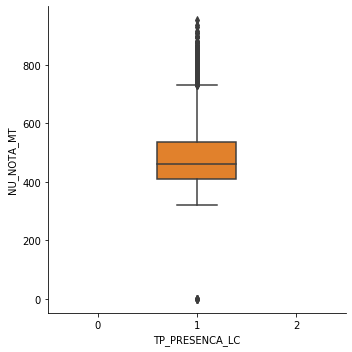

In [122]:
g=sns.catplot(x='TP_PRESENCA_LC',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

In [123]:
# Quem faltou na prova de linguagem não teve nota na prova de matemática, pois ambas foram no mesmo dia.

###  CO_PROVA_MT

In [124]:
df.groupby('CO_PROVA_MT')['NU_NOTA_MT'].mean()

CO_PROVA_MT
0e0082361eaceb6418bb17305a2b7912650b4783    494.676119
0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e    457.146875
2d22ac1d42e6187f09ee6c578df187a760123ccf           NaN
577f8968d95046f5eb5cc158608e12fa9ba34c85    477.770533
6d6961694e839531aec2d35bbd8552b55394a0d7    477.229630
73c5c86eef8f70263e4c5708d153cca123f93378    485.358730
767a32545304ed293242d528f54d4edb1369f910    481.320601
81d0ee00ef42a7c23eb04496458c03d4c5b9c31a    491.035575
97caab1e1533dba217deb7ef41490f52e459ab01    480.557179
Name: NU_NOTA_MT, dtype: float64

In [125]:
df['CO_PROVA_MT'].value_counts()

2d22ac1d42e6187f09ee6c578df187a760123ccf    3597
577f8968d95046f5eb5cc158608e12fa9ba34c85    2664
81d0ee00ef42a7c23eb04496458c03d4c5b9c31a    2454
97caab1e1533dba217deb7ef41490f52e459ab01    2403
767a32545304ed293242d528f54d4edb1369f910    2364
0e0082361eaceb6418bb17305a2b7912650b4783      67
0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e      64
73c5c86eef8f70263e4c5708d153cca123f93378      63
6d6961694e839531aec2d35bbd8552b55394a0d7      54
Name: CO_PROVA_MT, dtype: int64

In [126]:
# Não consegui chegar a conclusões avaliando as cores das provas. 

### Notas de matemática e opção de língua estrangeira

In [127]:
df['TP_LINGUA'].value_counts(dropna=False)

1    8151
0    5579
Name: TP_LINGUA, dtype: int64

In [128]:
# 0: Inglês, 1:Espanhol

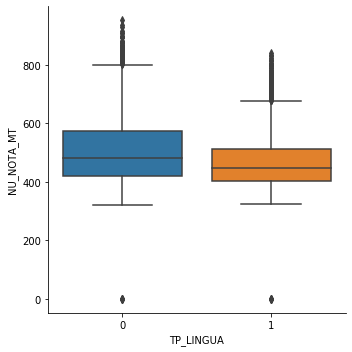

In [129]:
g=sns.catplot(x='TP_LINGUA',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

In [130]:
# Média das notas de Matemática pessoas com baixa visão

In [131]:
df.groupby('TP_LINGUA')['NU_NOTA_MT'].mean()

TP_LINGUA
0    506.117444
1    465.330709
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática em diferentes anos de conclusão

In [132]:
t2, p2 = stats.ttest_ind(df[(df['TP_LINGUA']==0)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['TP_LINGUA']==1)&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = 19.914087021288175
p_scipy = 4.3822599342531006e-86


### Notas de matemática e estudo do pai

In [133]:
df['Q001'].value_counts(dropna=False)

B    3309
E    3079
C    2146
D    1733
H    1456
A     934
F     719
G     354
Name: Q001, dtype: int64

In [134]:
ordem = ['H','A','B','C','D','E','F','G']

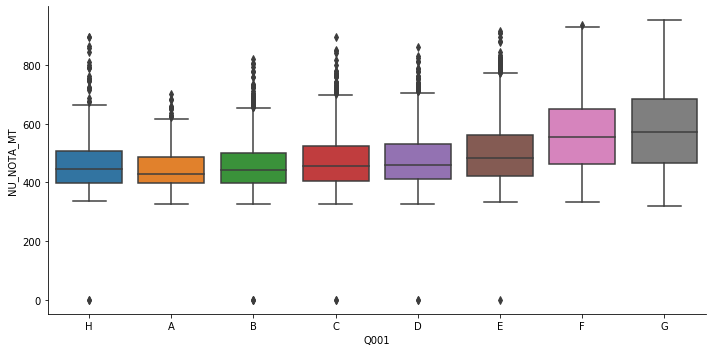

In [135]:
g=sns.catplot(x='Q001',y='NU_NOTA_MT',data=df, kind='box', aspect=2,order=ordem)
plt.show()

In [136]:
# Média das notas de Matemática de acordo com anos de estudo do pai

In [137]:
df.groupby('Q001')['NU_NOTA_MT'].mean()

Q001
A    446.060526
B    457.126916
C    472.326650
D    479.013961
E    501.525041
F    559.595537
G    584.218900
H    462.490427
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática 

In [138]:
t2, p2 = stats.ttest_ind(df[(df['Q001']=='G')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['Q001']=='A')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = 16.708279945530016
p_scipy = 5.125298272409043e-47


### Notas de matemática e estudo da mãe

In [139]:
df['Q002'].value_counts(dropna=False)

E    3883
B    2627
C    2162
D    2083
F     964
H     720
G     648
A     643
Name: Q002, dtype: int64

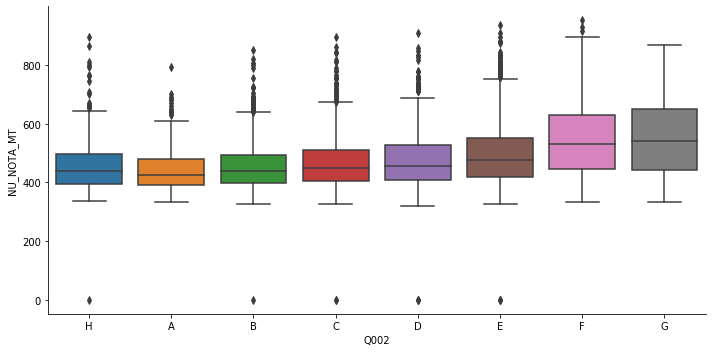

In [140]:
g=sns.catplot(x='Q002',y='NU_NOTA_MT',data=df, kind='box', aspect=2,order=ordem)
plt.show()

In [141]:
# Média das notas de Matemática de acordo com anos de estudo da mãe

In [142]:
df.groupby('Q002')['NU_NOTA_MT'].mean()

Q002
A    441.634197
B    452.654969
C    465.576126
D    472.966932
E    493.465978
F    547.155435
G    548.622995
H    455.314230
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática 

In [143]:
t2, p2 = stats.ttest_ind(df[(df['Q002']=='G')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['Q002']=='A')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = 16.68521057880008
p_scipy = 8.882093173061289e-55


### Notas de matemática e faixa de renda

In [144]:
df['Q006'].value_counts(dropna=False)

B    4264
C    3641
D    1636
E    1028
F     667
G     642
A     491
H     433
I     253
J     165
N      97
K      93
P      68
Q      66
O      66
L      65
M      55
Name: Q006, dtype: int64

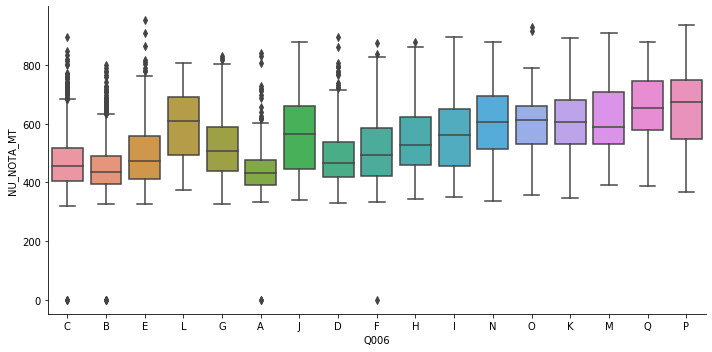

In [145]:
g=sns.catplot(x='Q006',y='NU_NOTA_MT',data=df, kind='box', aspect=2)
plt.show()

In [146]:
# Média das notas de Matemática de acordo com a renda

In [147]:
df.groupby('Q006')['NU_NOTA_MT'].mean()

Q006
A    445.497590
B    449.291854
C    468.926789
D    484.777778
E    491.889961
F    509.922709
G    520.758468
H    544.732418
I    557.673636
J    565.094444
K    601.339241
L    590.639286
M    614.064444
N    601.639535
O    608.560377
P    651.070968
Q    655.198148
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática 

In [148]:
t2, p2 = stats.ttest_ind(df[(df['Q006']=='Q')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['Q006']=='A')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = 12.972452581766824
p_scipy = 1.5102854709662623e-19


### Notas de matemática e computador na residência

In [149]:
df['Q024'].value_counts(dropna=False)

B    6441
A    6107
C     865
D     220
E      97
Name: Q024, dtype: int64

In [150]:
comp=['A','B','C','D','E']

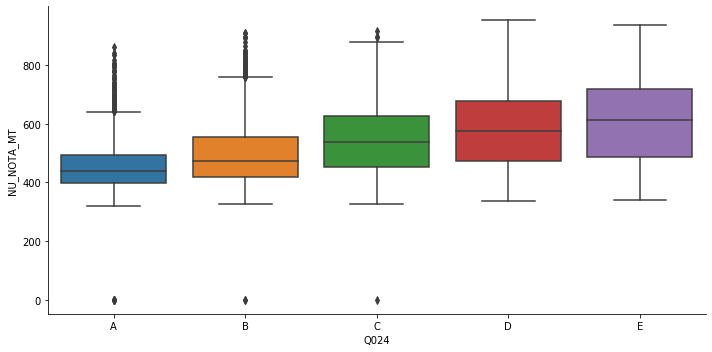

In [151]:
g=sns.catplot(x='Q024',y='NU_NOTA_MT',data=df, kind='box', aspect=2,order=comp)
plt.show()

In [152]:
# Média das notas de Matemática x computadores em casa

In [153]:
df.groupby('Q024')['NU_NOTA_MT'].mean()

Q024
A    453.088311
B    493.092180
C    549.409322
D    584.255319
E    607.478313
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática 

In [154]:
t2, p2 = stats.ttest_ind(df[(df['Q024']=='A')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['Q024']=='B')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = -21.362078025516944
p_scipy = 8.262907119986049e-99


### Notas de matemática e acesso à internet

In [155]:
df['Q025'].value_counts(dropna=False)

B    7815
A    5915
Name: Q025, dtype: int64

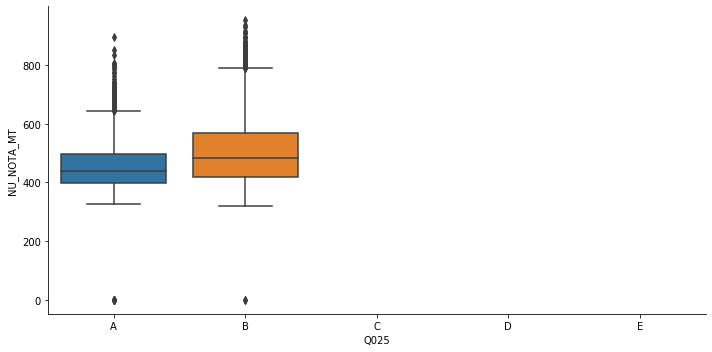

In [156]:
g=sns.catplot(x='Q025',y='NU_NOTA_MT',data=df, kind='box', aspect=2,order=comp)
plt.show()

In [157]:
# Média das notas de Matemática x computadores em casa

In [158]:
df.groupby('Q025')['NU_NOTA_MT'].mean()

Q025
A    453.407017
B    503.488260
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática 

In [159]:
t2, p2 = stats.ttest_ind(df[(df['Q025']=='A')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['Q025']=='B')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = -26.970501333457033
p_scipy = 8.844369956776268e-155


### Notas de matemática e exercício de atividade remunerada


In [160]:
df['Q026'].value_counts(dropna=False)

A    7215
B    3509
C    3006
Name: Q026, dtype: int64

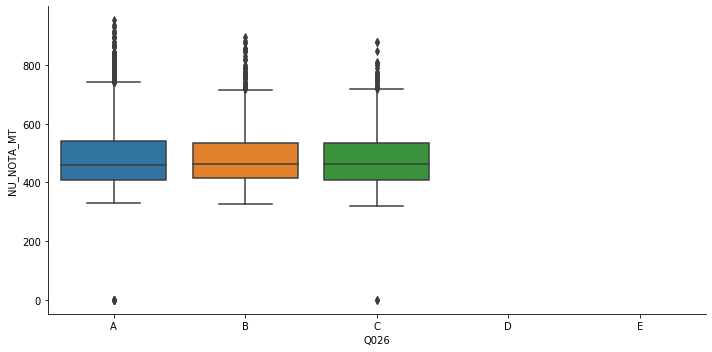

In [161]:
g=sns.catplot(x='Q026',y='NU_NOTA_MT',data=df, kind='box', aspect=2,order=comp)
plt.show()

In [162]:
# Média das notas de Matemática x atividade remunerada

In [163]:
df.groupby('Q026')['NU_NOTA_MT'].mean()

Q026
A    483.507345
B    482.537756
C    479.278318
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática 

In [164]:
t2, p2 = stats.ttest_ind(df[(df['Q026']=='A')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['Q026']=='C')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = 1.693491199718004
p_scipy = 0.09044866430554253


### Notas de matemática e tipo de escola no Ensino Médio


In [165]:
df['Q047'].value_counts(dropna=False)

A    11726
D     1173
B      348
E      321
C      162
Name: Q047, dtype: int64

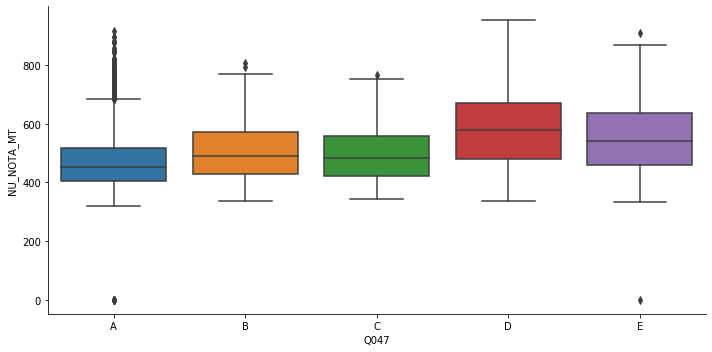

In [166]:
g=sns.catplot(x='Q047',y='NU_NOTA_MT',data=df, kind='box', aspect=2,order=comp)
plt.show()

In [167]:
# Média das notas de Matemática x atividade remunerada

In [168]:
df.groupby('Q047')['NU_NOTA_MT'].mean()

Q047
A    467.377728
B    508.825506
C    498.773387
D    579.662196
E    553.295985
Name: NU_NOTA_MT, dtype: float64

#### t-test : notas de matemática 

In [169]:
t2, p2 = stats.ttest_ind(df[(df['Q047']=='A')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         df[(df['Q047']=='D')&(df['NU_NOTA_MT'].isna()!=True)]['NU_NOTA_MT'],
                         equal_var = False)
print("t_scipy = " + str(t2))
print("p_scipy = " + str(p2))


t_scipy = -28.17754697441848
p_scipy = 2.472043170594709e-133


## Valores NaN em notas: o que significam?

### Nota de matemática: valores Nan

In [170]:
df[(df['TP_PRESENCA_MT']==0)| (df['TP_PRESENCA_MT']==2)]['NU_NOTA_MT']

2       NaN
3       NaN
4       NaN
9       NaN
13      NaN
15      NaN
19      NaN
21      NaN
22      NaN
23      NaN
24      NaN
26      NaN
37      NaN
51      NaN
55      NaN
59      NaN
64      NaN
67      NaN
78      NaN
79      NaN
81      NaN
83      NaN
87      NaN
89      NaN
99      NaN
101     NaN
104     NaN
112     NaN
113     NaN
119     NaN
120     NaN
122     NaN
126     NaN
127     NaN
130     NaN
136     NaN
137     NaN
145     NaN
146     NaN
148     NaN
150     NaN
153     NaN
156     NaN
161     NaN
168     NaN
173     NaN
176     NaN
180     NaN
181     NaN
194     NaN
196     NaN
203     NaN
207     NaN
212     NaN
214     NaN
217     NaN
220     NaN
221     NaN
224     NaN
226     NaN
230     NaN
231     NaN
235     NaN
238     NaN
243     NaN
244     NaN
261     NaN
266     NaN
269     NaN
279     NaN
287     NaN
290     NaN
292     NaN
294     NaN
295     NaN
296     NaN
313     NaN
315     NaN
318     NaN
321     NaN
323     NaN
328     NaN
333     NaN
334 

In [171]:
# Aqui podemos ver que se o aluno faltou ou foi eliminado, a nota está com valor NaN

In [172]:
# TP_PRESENCA_MT indica se o aluno compareceu ou não na prova de matemática, onde 1 significa que compareceu, 0, que faltou e
# 2, que foi declassificado

In [173]:
# Percentual de presença:

In [174]:
100*df['TP_PRESENCA_MT'].value_counts()/df.shape[0]

1    73.801894
0    26.161690
2     0.036417
Name: TP_PRESENCA_MT, dtype: float64

In [175]:
# 1: Presente na prova
# 0: faltou na prova
# Eliminado na prova

In [176]:
df[(df['TP_PRESENCA_MT']==0)| (df['TP_PRESENCA_MT']==2)].shape[0]

3597

In [177]:
df['NU_NOTA_MT'].isnull().sum()

3597

### Notas em Ciências da Natureza

In [178]:
df['NU_NOTA_CN'].isnull().sum()

3389

In [179]:
df['TP_PRESENCA_CN'].value_counts()

1    10341
0     3380
2        9
Name: TP_PRESENCA_CN, dtype: int64

In [180]:
df[(df['TP_PRESENCA_CN']==0)| (df['TP_PRESENCA_CN']==2)]['NU_NOTA_CN']

2       NaN
3       NaN
4       NaN
9       NaN
13      NaN
15      NaN
21      NaN
22      NaN
23      NaN
24      NaN
26      NaN
37      NaN
51      NaN
55      NaN
59      NaN
64      NaN
67      NaN
78      NaN
79      NaN
81      NaN
83      NaN
87      NaN
89      NaN
99      NaN
101     NaN
104     NaN
113     NaN
119     NaN
120     NaN
122     NaN
126     NaN
127     NaN
130     NaN
136     NaN
137     NaN
145     NaN
146     NaN
150     NaN
153     NaN
156     NaN
161     NaN
168     NaN
173     NaN
176     NaN
180     NaN
181     NaN
194     NaN
196     NaN
203     NaN
207     NaN
212     NaN
214     NaN
217     NaN
220     NaN
221     NaN
224     NaN
226     NaN
230     NaN
231     NaN
235     NaN
238     NaN
244     NaN
261     NaN
266     NaN
269     NaN
279     NaN
287     NaN
290     NaN
292     NaN
294     NaN
295     NaN
313     NaN
315     NaN
318     NaN
321     NaN
323     NaN
328     NaN
333     NaN
334     NaN
340     NaN
341     NaN
342     NaN
347     NaN
348 

In [181]:
df[(df['TP_PRESENCA_CN']==0)| (df['TP_PRESENCA_CN']==2)].shape[0]

3389

### Notas em Ciências Humanas

In [182]:
df['NU_NOTA_CH'].isnull().sum()

3389

In [183]:
df['TP_PRESENCA_CH'].value_counts()

1    10341
0     3380
2        9
Name: TP_PRESENCA_CH, dtype: int64

In [184]:
df[(df['TP_PRESENCA_CH']==0)| (df['TP_PRESENCA_CH']==2)]['NU_NOTA_CH']

2       NaN
3       NaN
4       NaN
9       NaN
13      NaN
15      NaN
21      NaN
22      NaN
23      NaN
24      NaN
26      NaN
37      NaN
51      NaN
55      NaN
59      NaN
64      NaN
67      NaN
78      NaN
79      NaN
81      NaN
83      NaN
87      NaN
89      NaN
99      NaN
101     NaN
104     NaN
113     NaN
119     NaN
120     NaN
122     NaN
126     NaN
127     NaN
130     NaN
136     NaN
137     NaN
145     NaN
146     NaN
150     NaN
153     NaN
156     NaN
161     NaN
168     NaN
173     NaN
176     NaN
180     NaN
181     NaN
194     NaN
196     NaN
203     NaN
207     NaN
212     NaN
214     NaN
217     NaN
220     NaN
221     NaN
224     NaN
226     NaN
230     NaN
231     NaN
235     NaN
238     NaN
244     NaN
261     NaN
266     NaN
269     NaN
279     NaN
287     NaN
290     NaN
292     NaN
294     NaN
295     NaN
313     NaN
315     NaN
318     NaN
321     NaN
323     NaN
328     NaN
333     NaN
334     NaN
340     NaN
341     NaN
342     NaN
347     NaN
348 

In [185]:
df[(df['TP_PRESENCA_CH']==0)| (df['TP_PRESENCA_CH']==2)].shape[0]

3389

### Notas em Linguagens e Códigos

In [186]:
df['NU_NOTA_LC'].isnull().sum()

3597

In [187]:
df['TP_PRESENCA_LC'].value_counts()

1    10133
0     3592
2        5
Name: TP_PRESENCA_LC, dtype: int64

In [188]:
df[(df['TP_PRESENCA_LC']==0)| (df['TP_PRESENCA_LC']==2)]['NU_NOTA_LC']

2       NaN
3       NaN
4       NaN
9       NaN
13      NaN
15      NaN
19      NaN
21      NaN
22      NaN
23      NaN
24      NaN
26      NaN
37      NaN
51      NaN
55      NaN
59      NaN
64      NaN
67      NaN
78      NaN
79      NaN
81      NaN
83      NaN
87      NaN
89      NaN
99      NaN
101     NaN
104     NaN
112     NaN
113     NaN
119     NaN
120     NaN
122     NaN
126     NaN
127     NaN
130     NaN
136     NaN
137     NaN
145     NaN
146     NaN
148     NaN
150     NaN
153     NaN
156     NaN
161     NaN
168     NaN
173     NaN
176     NaN
180     NaN
181     NaN
194     NaN
196     NaN
203     NaN
207     NaN
212     NaN
214     NaN
217     NaN
220     NaN
221     NaN
224     NaN
226     NaN
230     NaN
231     NaN
235     NaN
238     NaN
243     NaN
244     NaN
261     NaN
266     NaN
269     NaN
279     NaN
287     NaN
290     NaN
292     NaN
294     NaN
295     NaN
296     NaN
313     NaN
315     NaN
318     NaN
321     NaN
323     NaN
328     NaN
333     NaN
334 

In [189]:
df[(df['TP_PRESENCA_LC']==0)| (df['TP_PRESENCA_LC']==2)].shape[0]

3597

<font color='green'> <font size='4'>**Notas com valores NaN correspondem à ausência ou desclassificação na prova!**</font></font>

## Correlação entre a nota de matemática e a nota nas outras disciplinas

In [190]:
df[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']].corr()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
NU_NOTA_MT,1.000000,0.584941,0.529594,0.494695
NU_NOTA_CN,0.584941,1.000000,0.609543,0.545667
NU_NOTA_CH,0.529594,0.609543,1.000000,0.692988
NU_NOTA_LC,0.494695,0.545667,0.692988,1.000000


In [191]:
# Existe correlação moderada entre as notas das outras disciplinas e a nota na prova de matemática

## Correlação entre falta na prova de matemática e falta nas outras provas

In [192]:
df[['TP_PRESENCA_MT','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC']].corr()

,TP_PRESENCA_MT,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC
TP_PRESENCA_MT,1.000000,0.943361,0.943361,1.000000
TP_PRESENCA_CN,0.943361,1.000000,1.000000,0.943361
TP_PRESENCA_CH,0.943361,1.000000,1.000000,0.943361
TP_PRESENCA_LC,1.000000,0.943361,0.943361,1.000000


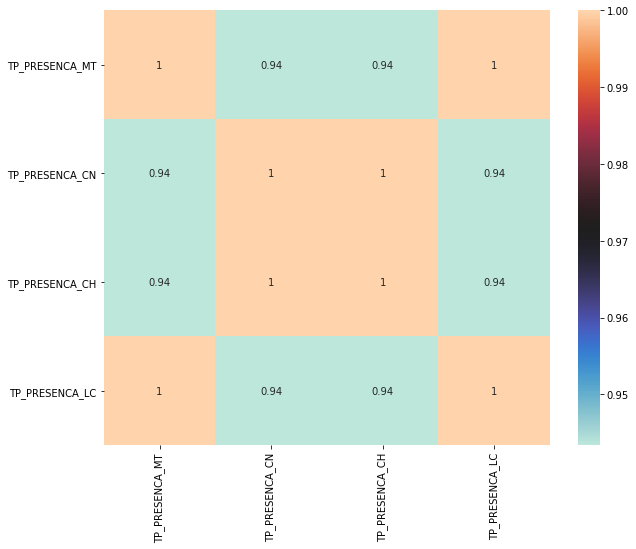

In [193]:
ax = sns.heatmap(df[['TP_PRESENCA_MT','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC']].corr(method='pearson'), annot=True, cmap='icefire')
ax=plt.gcf()
ax.set_size_inches(10,8)
plt.show()

In [194]:
# Existe uma correlação muito alta entre as faltas nas provas de outras disciplinas e faltas na prova de matemática.
# Ou seja, alunos que faltam em outras provas tendem a faltar também na prova de matemática.

## Correlação das variáveis com a target

### Seleção de apenas algumas colunas para análise

In [195]:
df2= df[['SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA',  'IN_TREINEIRO', 'IN_BAIXA_VISAO','IN_SURDEZ', 
        'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
         'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q047','NU_NOTA_MT']]

In [196]:
df2.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_SURDEZ,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,RS,24,M,1,1,1,4,1,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,A,399.4
1,CE,17,F,3,1,2,0,2,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,A,459.8
2,CE,21,F,3,1,3,0,1,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,A,NaN
3,RJ,25,F,0,1,1,9,1,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,D,NaN
4,AM,28,M,2,1,1,4,1,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,A,NaN


In [197]:
df2.isnull().sum()

SG_UF_RESIDENCIA        0
NU_IDADE                0
TP_SEXO                 0
TP_COR_RACA             0
TP_NACIONALIDADE        0
TP_ST_CONCLUSAO         0
TP_ANO_CONCLUIU         0
TP_ESCOLA               0
IN_TREINEIRO            0
IN_BAIXA_VISAO          0
IN_SURDEZ               0
TP_PRESENCA_CN          0
TP_PRESENCA_CH          0
TP_PRESENCA_LC          0
NU_NOTA_CN           3389
NU_NOTA_CH           3389
NU_NOTA_LC           3597
TP_LINGUA               0
TP_STATUS_REDACAO    3597
NU_NOTA_COMP1        3597
NU_NOTA_COMP2        3597
NU_NOTA_COMP3        3597
NU_NOTA_COMP4        3597
NU_NOTA_COMP5        3597
NU_NOTA_REDACAO      3597
Q001                    0
Q002                    0
Q006                    0
Q024                    0
Q025                    0
Q026                    0
Q047                    0
NU_NOTA_MT           3597
dtype: int64

In [198]:
df2['TP_PRESENCA_LC'].value_counts()

1    10133
0     3592
2        5
Name: TP_PRESENCA_LC, dtype: int64

In [199]:
df2.corr()['NU_NOTA_MT'].sort_values(ascending = False)

NU_NOTA_MT           1.000000
NU_NOTA_CN           0.584941
NU_NOTA_CH           0.529594
NU_NOTA_LC           0.494695
NU_NOTA_REDACAO      0.379376
NU_NOTA_COMP3        0.350307
NU_NOTA_COMP5        0.343337
NU_NOTA_COMP4        0.342282
NU_NOTA_COMP2        0.335638
NU_NOTA_COMP1        0.299402
TP_ESCOLA            0.069304
TP_ANO_CONCLUIU      0.029039
TP_PRESENCA_CN       0.003552
TP_PRESENCA_CH       0.003552
IN_BAIXA_VISAO       0.000685
IN_SURDEZ           -0.015249
IN_TREINEIRO        -0.022287
TP_NACIONALIDADE    -0.034965
TP_STATUS_REDACAO   -0.059376
NU_IDADE            -0.061485
TP_ST_CONCLUSAO     -0.087869
TP_COR_RACA         -0.157364
TP_LINGUA           -0.201726
TP_PRESENCA_LC            NaN
Name: NU_NOTA_MT, dtype: float64

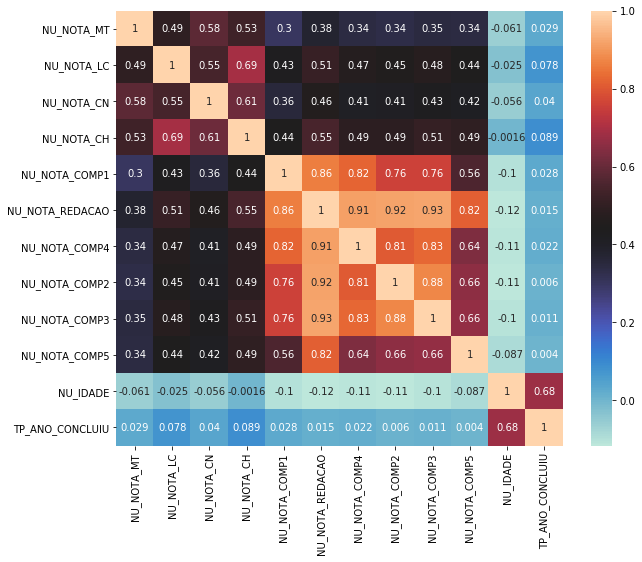

In [200]:
ax = sns.heatmap(df[['NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_CN','NU_NOTA_CH',
                    'NU_NOTA_COMP1','NU_NOTA_REDACAO','NU_NOTA_COMP4','NU_NOTA_COMP2',
                     'NU_NOTA_COMP3','NU_NOTA_COMP5', 'NU_IDADE','TP_ANO_CONCLUIU']].corr(method='pearson'), 
                 annot=True, cmap='icefire')
ax=plt.gcf()
ax.set_size_inches(10,8)
plt.show()

### Nota de Matemática x Nota linguagens e códigos

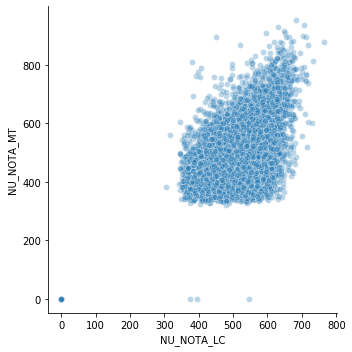

In [201]:
sns.relplot(x='NU_NOTA_LC',y='NU_NOTA_MT',data=df2, kind='scatter',alpha=0.3)
plt.show()

### Nota de Matemática x Nota Ciências da Natureza

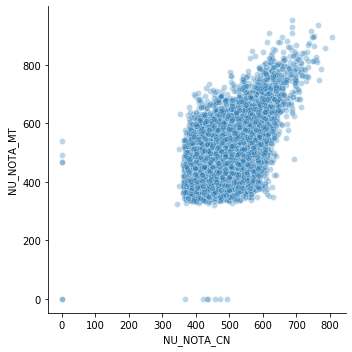

In [202]:
sns.relplot(x='NU_NOTA_CN',y='NU_NOTA_MT',data=df2, kind='scatter',alpha=0.3)
plt.show()

### Nota de Matemática x Nota Ciências Humanas

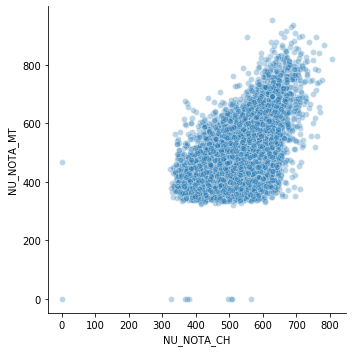

In [203]:
sns.relplot(x='NU_NOTA_CH',y='NU_NOTA_MT',data=df2, kind='scatter',alpha=0.3)
plt.show()

### Nota de Matemática x Nota Competência 1

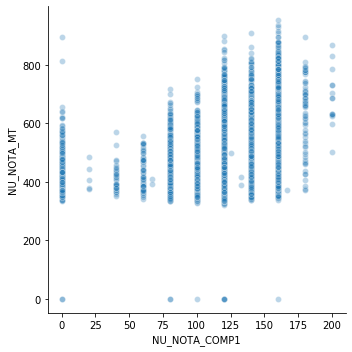

In [204]:
sns.relplot(x='NU_NOTA_COMP1',y='NU_NOTA_MT',data=df2, kind='scatter',alpha=0.3)
plt.show()

### Nota de Matemática x Nota Competência 2

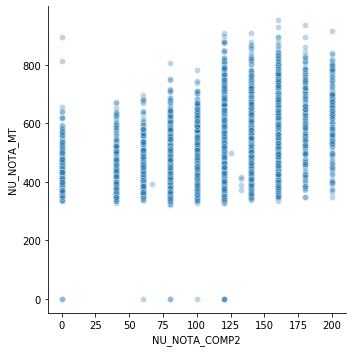

In [205]:
sns.relplot(x='NU_NOTA_COMP2',y='NU_NOTA_MT',data=df2, kind='scatter',alpha=0.3)
plt.show()

### Nota de Matemática x Nota Competência 3

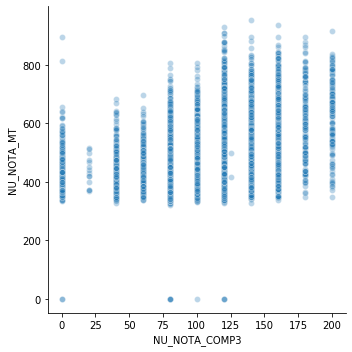

In [206]:
sns.relplot(x='NU_NOTA_COMP3',y='NU_NOTA_MT',data=df2, kind='scatter',alpha=0.3)
plt.show()

### Nota de Matemática x Nota Competência 4

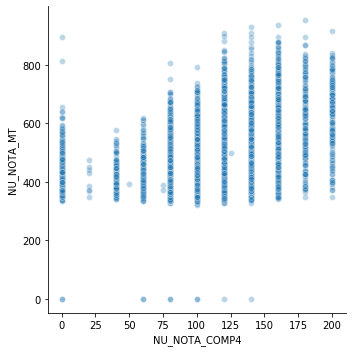

In [207]:
sns.relplot(x='NU_NOTA_COMP4',y='NU_NOTA_MT',data=df2, kind='scatter',alpha=0.3)
plt.show()

### Nota de Matemática x Nota Competência 5

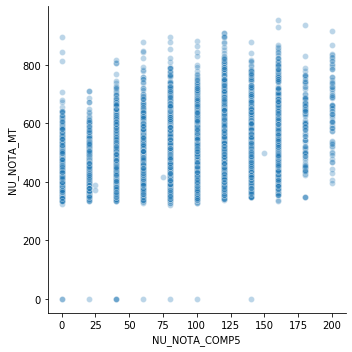

In [208]:
sns.relplot(x='NU_NOTA_COMP5',y='NU_NOTA_MT',data=df2, kind='scatter',alpha=0.3)
plt.show()

### Nota de Matemática x Nota Redação

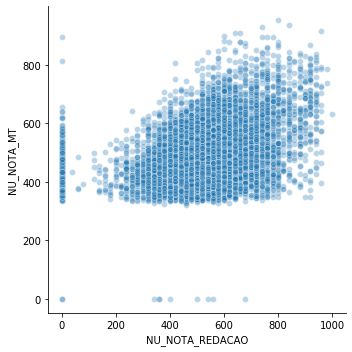

In [209]:
sns.relplot(x='NU_NOTA_REDACAO',y='NU_NOTA_MT',data=df2, kind='scatter',alpha=0.3)
plt.show()

## Variável 'TX_RESPOSTAS_MT'

In [210]:
# Contém as respostas do aluno para a prova de matemática

In [211]:
df['TX_RESPOSTAS_MT'][0:5]

0    AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA
1    AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB
2                                              NaN
3                                              NaN
4                                              NaN
Name: TX_RESPOSTAS_MT, dtype: object

## Variável 'TX_GABARITO_MT'

In [212]:
# Contém o gabarito da prova de matemática

In [213]:
df['TX_GABARITO_MT'][0:5]

0    DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC
1    DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC
2                                              NaN
3                                              NaN
4                                              NaN
Name: TX_GABARITO_MT, dtype: object

## Quantas questões tem a prova de matemática?

In [214]:
respostas = 'DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC'
len(respostas)

45

## Como foram as notas de matemática das pessoas que foram desclassificadas ou faltaram em outras provas?

### Número de pessoas que faltaram ou foram desclassificadas na prova de Ciências da Natureza

In [215]:
Nota_CN_NaN = df[(df['NU_NOTA_CN'].isnull() == True)]['NU_NOTA_MT'].shape[0]
Nota_CN_NaN

3389

In [216]:
# Dessas pessoas, quantas também foram desclassificadas ou faltaram na prova de matemática?

In [217]:
df[(df['NU_NOTA_CN'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == True)].shape[0]

3353

In [218]:
100*df[(df['NU_NOTA_CN'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == True)].shape[0]/Nota_CN_NaN

98.93773974623782

In [219]:
# E quantas tiveram alguma nota?

In [220]:
df[(df['NU_NOTA_CN'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == False)].shape[0]

36

In [221]:
100*df[(df['NU_NOTA_CN'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == False)].shape[0]/Nota_CN_NaN

1.0622602537621717

In [222]:
# Apenas 1% das pessoas que foram desclassificadas ou faltaram em Ciências da Natureza, tiveram alguma nota
# em Matemática

In [223]:
outlierCN = list(df[(df['NU_NOTA_CN'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == False)].index)
outlierCN[0:5]

[429, 1000, 1662, 1805, 1809]

In [224]:
len(outlierCN)

36

In [225]:
df[(df['NU_NOTA_CN'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == False)]['NU_NOTA_MT']

429        0.0
1000     445.4
1662     397.6
1805     466.8
1809     329.0
1843     381.1
2760     454.5
2946     472.6
3785     461.2
4202     409.3
4340     453.6
5124     389.6
5340     608.3
5797     392.7
6065     550.9
6388     417.9
6958     404.6
7126     441.3
7258     440.9
7656     445.2
7738     566.9
7773     336.3
7921     413.6
8064     407.8
8229     399.7
8964     383.9
9485     401.6
9495     393.4
10867    568.2
11385    445.3
12212    590.6
12615    367.8
12628    610.3
12652    878.3
13188    373.2
13318    348.8
Name: NU_NOTA_MT, dtype: float64

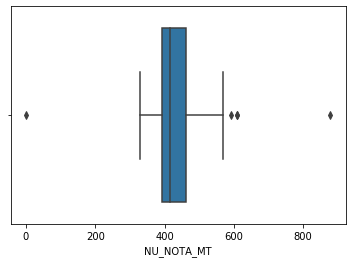

In [226]:
sns.boxplot(df[(df['NU_NOTA_CN'].isnull() == True)]['NU_NOTA_MT'])

### Número de pessoas que faltaram ou foram desclassificadas na prova de Ciências Humanas

In [227]:
Nota_CH_NaN = df[(df['NU_NOTA_CH'].isnull() == True)]['NU_NOTA_MT'].shape[0]
Nota_CH_NaN

3389

In [228]:
# Dessas pessoas, quantas também foram desclassificadas ou faltaram na prova de matemática?

In [229]:
df[(df['NU_NOTA_CH'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == True)].shape[0]

3353

In [230]:
100*df[(df['NU_NOTA_CH'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == True)].shape[0]/Nota_CH_NaN

98.93773974623782

In [231]:
# E quantas tiveram alguma nota?

In [232]:
df[(df['NU_NOTA_CH'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == False)].shape[0]

36

In [233]:
100*df[(df['NU_NOTA_CH'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == False)].shape[0]/Nota_CH_NaN

1.0622602537621717

In [234]:
outlierCH = list(df[(df['NU_NOTA_CH'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == False)].index)
outlierCH[0:5]

[429, 1000, 1662, 1805, 1809]

In [235]:
len(outlierCH)

36

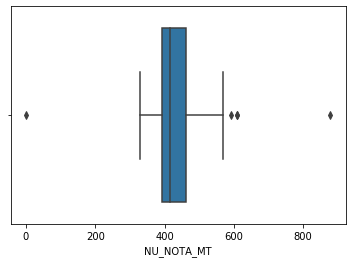

In [236]:
sns.boxplot(df[(df['NU_NOTA_CH'].isnull() == True)]['NU_NOTA_MT'])

### Número de pessoas que faltaram ou foram desclassificadas na prova de Linguagens e Códigos

In [237]:
Nota_LC_NaN = df[(df['NU_NOTA_LC'].isnull() == True)]['NU_NOTA_MT'].shape[0]
Nota_LC_NaN

3597

In [238]:
# Dessas pessoas, quantas também foram desclassificadas ou faltaram na prova de matemática?

In [239]:
df[(df['NU_NOTA_LC'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == True)].shape[0]

3597

In [240]:
100*df[(df['NU_NOTA_LC'].isnull() == True)&(df['NU_NOTA_MT'].isnull() == True)].shape[0]/Nota_LC_NaN

100.0

## Tratamento dos dados

In [241]:
df=df2.copy()

In [242]:
df.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_SURDEZ,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,RS,24,M,1,1,1,4,1,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,A,399.4
1,CE,17,F,3,1,2,0,2,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,A,459.8
2,CE,21,F,3,1,3,0,1,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,A,NaN
3,RJ,25,F,0,1,1,9,1,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,D,NaN
4,AM,28,M,2,1,1,4,1,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,A,NaN


In [243]:
n_observacoes_inicial = df.shape[0]
n_observacoes_inicial

13730

### Outliers em notas de Matemática, CN, CH e LC

In [244]:
# Exclusão de dados nos quais o aluno faltou em CN ou CH e teve nota em matemática

In [245]:
outliers = list(set(outlierCN + outlierCH)) 

In [246]:
len(outliers)

36

In [247]:
# Exclusão das pessoas que faltaram ou foram desclassificadas em CN ou CH e não foram desclassificadas em 
# Matemática

In [248]:
df[(df['TP_PRESENCA_CN']==0) &(df['NU_NOTA_MT']>600)].shape[0]

3

In [249]:
outlier_CN = list((df[(df['TP_PRESENCA_CN']==0) &(df['NU_NOTA_MT']>600)]).index)
outlier_CN

[5340, 12628, 12652]

In [250]:
outliers = list(set(outliers + outlier_CN)) 

In [251]:
len(outliers)

36

In [252]:
df= df.drop(outliers)

In [253]:
df.shape[0]

13694

In [254]:
# Exclusão de notas com valor zero 

In [255]:
df[(df['NU_NOTA_CN']==0)|(df['NU_NOTA_CH']==0)|(df['NU_NOTA_LC']==0)|(df['NU_NOTA_MT']==0)]

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_SURDEZ,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
111,RS,44,F,1,1,4,0,1,0,0,0,1,1,1,0.0,0.0,0.0,1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,B,B,C,A,A,C,A,0.0
2194,PR,19,F,0,1,4,0,1,0,0,0,1,1,1,0.0,0.0,483.5,1,1.0,120.0,120.0,120.0,120.0,40.0,520.0,C,C,E,A,A,A,A,466.7
3088,MA,32,M,0,1,1,10,1,0,0,0,1,1,0,0.0,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,F,N,B,B,C,D,NaN
3442,MA,22,F,3,1,1,2,1,0,0,0,1,1,1,366.6,375.0,394.2,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C,B,A,A,A,A,0.0
3783,SP,19,M,1,1,1,1,1,0,0,0,1,1,1,438.1,506.2,375.9,1,1.0,80.0,80.0,80.0,80.0,40.0,360.0,H,H,B,B,A,A,A,0.0
4927,SP,17,F,1,1,2,0,2,0,0,0,1,1,1,493.8,497.0,0.0,0,1.0,120.0,120.0,120.0,100.0,80.0,540.0,H,D,B,A,A,A,A,0.0
7352,PA,18,F,3,1,1,1,1,0,0,0,1,1,1,471.2,565.2,0.0,0,1.0,120.0,120.0,120.0,100.0,100.0,560.0,B,D,A,A,A,A,A,0.0
7596,PE,18,F,3,1,2,0,2,0,0,0,1,1,1,422.4,509.0,546.4,0,1.0,120.0,120.0,100.0,120.0,40.0,500.0,D,E,C,A,A,C,A,0.0
8397,PB,21,M,2,1,2,0,2,0,0,0,1,1,1,457.8,366.9,0.0,1,1.0,100.0,100.0,80.0,60.0,20.0,360.0,B,C,C,A,A,A,A,0.0
10623,RJ,18,M,3,1,2,0,2,0,0,0,1,1,1,0.0,505.4,494.8,0,1.0,120.0,100.0,80.0,80.0,40.0,420.0,E,D,D,B,B,A,A,540.1


In [256]:
df = df[(df['NU_NOTA_CN']!=0)&(df['NU_NOTA_CH']!=0)&(df['NU_NOTA_LC']!=0)&(df['NU_NOTA_MT']!=0)]

In [257]:
df.shape[0]

13680

In [258]:
# Percentual de dados preservados

In [259]:
100*df.shape[0]/n_observacoes_inicial

99.63583394027677

### Substituição de valores NaN em notas por zero?

In [260]:
# Quantas pessoas tiveram notas nulas em alguma das provas (MT, CN, CH ou LC)?

In [261]:
notas_nulas = df[(df['NU_NOTA_MT'].isnull()==True)|(df['NU_NOTA_CN'].isnull()==True)|(df['NU_NOTA_CH'].isnull()==True)|(df['NU_NOTA_LC'].isnull()==True)].shape[0]
notas_nulas

3596

In [262]:
# Percentual de pessoas que tiveram notas nulas em alguma das provas (MT, CN, CH ou LC)

In [263]:
100*notas_nulas/n_observacoes_inicial

26.190823015294974

In [264]:
# Quantas pessoas tiveram notas nulas em matemática?

In [265]:
df[(df['NU_NOTA_MT'].isnull()==True)].shape[0]

3596

In [266]:
# Percentual de pessoas que tiveram notas nulas em matemática

In [267]:
100*df[(df['NU_NOTA_MT'].isnull()==True)].shape[0]/n_observacoes_inicial

26.190823015294974

In [268]:
# Substituição de notas NaN por zero

In [269]:
df = df.fillna(value={'NU_NOTA_CN':0,'NU_NOTA_CH':0,'NU_NOTA_LC':0,
                     'NU_NOTA_COMP1':0, 'NU_NOTA_COMP2':0, 'NU_NOTA_COMP3':0,
                     'NU_NOTA_COMP4':0, 'NU_NOTA_COMP5':0, 'NU_NOTA_REDACAO':0})

In [270]:
# Podemos verificar que os valores NaN em TP_STATUS_REDACAO, NU_NOTA_COMP1/2/3/4/5  e NU_NOTA_REDACAO correspondem 
# à quantidade de alunos que faltaram ou foram desclassificados na prova de Linguagens e Códigos.
# Irei substituir NaN por zero

In [271]:
# Após a transformação dos dados:

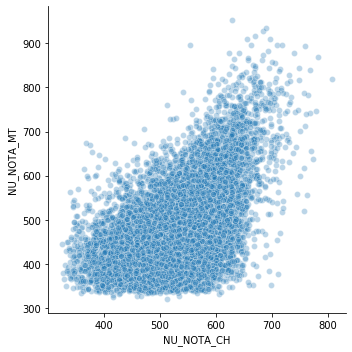

In [272]:
sns.relplot(x='NU_NOTA_CH',y='NU_NOTA_MT',data=df, kind='scatter',alpha=0.3)
plt.show()

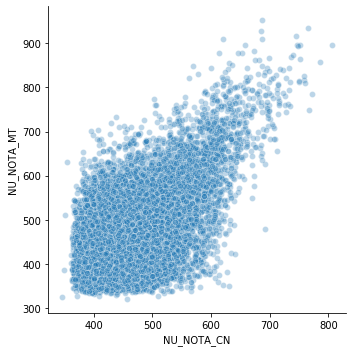

In [273]:
sns.relplot(x='NU_NOTA_CN',y='NU_NOTA_MT',data=df, kind='scatter',alpha=0.3)
plt.show()

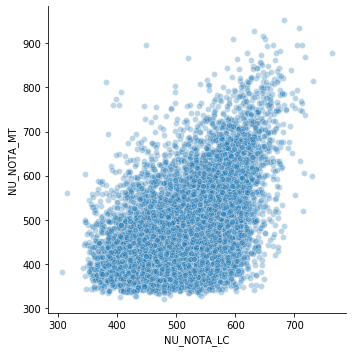

In [274]:
sns.relplot(x='NU_NOTA_LC',y='NU_NOTA_MT',data=df, kind='scatter',alpha=0.3)
plt.show()

### TP_ANO_CONCLUIU:


In [275]:
df0.groupby('TP_ANO_CONCLUIU')['NU_INSCRICAO'].nunique()

TP_ANO_CONCLUIU
0     7206
1     1578
2     1033
3      712
4      563
5      379
6      383
7      294
8      221
9      194
10    1167
Name: NU_INSCRICAO, dtype: int64

In [276]:
# Criação de nova coluna para indicar quantos anos a pessoa tem de formado

In [277]:
df.loc[(df.TP_ANO_CONCLUIU==0),'anos_formacao']=0
df.loc[(df.TP_ANO_CONCLUIU==1),'anos_formacao']=1
df.loc[(df.TP_ANO_CONCLUIU==2),'anos_formacao']=2
df.loc[(df.TP_ANO_CONCLUIU==3),'anos_formacao']=3
df.loc[(df.TP_ANO_CONCLUIU==4),'anos_formacao']=4
df.loc[(df.TP_ANO_CONCLUIU==5),'anos_formacao']=5
df.loc[(df.TP_ANO_CONCLUIU==6),'anos_formacao']=6
df.loc[(df.TP_ANO_CONCLUIU==7),'anos_formacao']=7
df.loc[(df.TP_ANO_CONCLUIU==8),'anos_formacao']=8
df.loc[(df.TP_ANO_CONCLUIU==9),'anos_formacao']=9
df.loc[(df.TP_ANO_CONCLUIU==10),'anos_formacao']=10


In [278]:
df.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_SURDEZ,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT,anos_formacao
0,RS,24,M,1,1,1,4,1,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,A,399.4,4.0
1,CE,17,F,3,1,2,0,2,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,A,459.8,0.0
2,CE,21,F,3,1,3,0,1,0,0,0,0,0,0,0.0,0.0,0.0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,D,D,C,A,A,A,A,NaN,0.0
3,RJ,25,F,0,1,1,9,1,0,0,0,0,0,0,0.0,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,H,E,E,C,B,C,D,NaN,9.0
4,AM,28,M,2,1,1,4,1,0,0,0,0,0,0,0.0,0.0,0.0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,E,D,C,A,A,B,A,NaN,4.0


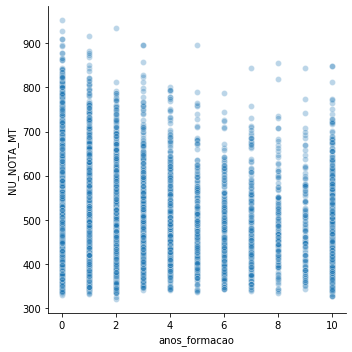

In [279]:
sns.relplot(x='anos_formacao',y='NU_NOTA_MT',data=df, kind='scatter',alpha=0.3)
plt.show()

### Escola privada x não privada

In [280]:
df['TP_ESCOLA']=df['TP_ESCOLA'].map({1: 'Outros', 
                                           2: 'Outros',
                                           3: 'Privada',
                                           4: 'Outros'})

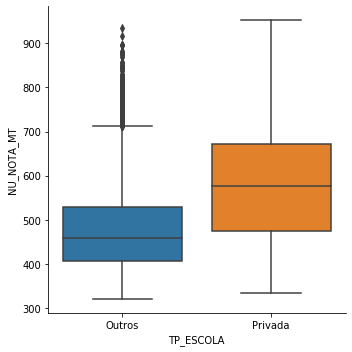

In [281]:
g=sns.catplot(x='TP_ESCOLA',y='NU_NOTA_MT',data=df, kind='box', aspect=1)
plt.show()

### Ano de estudo do pai

In [282]:
# Substitui a categoria H (não sei) pela categoria mais frequente B. Alterei as letras por números.

In [283]:
df['Q001']=df['Q001'].map({'A':1,
                           'B':2,
                           'C':3,
                           'D':4,
                           'E':5,
                           'F':6,
                           'G':7,
                           'H':2})

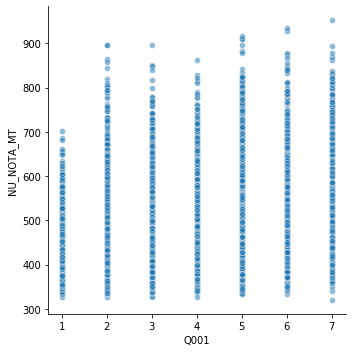

In [284]:
sns.relplot(x='Q001',y='NU_NOTA_MT',data=df, kind='scatter',alpha=0.5)
plt.show()

### Ano de estudo da mãe

In [285]:
# Substitui a categoria H (não sei) pela categoria mais frequente B. Alterei as letras por números.

In [286]:
df['Q002']=df['Q002'].map({'A':1,
                           'B':2,
                           'C':3,
                           'D':4,
                           'E':5,
                           'F':6,
                           'G':7,
                           'H':2})

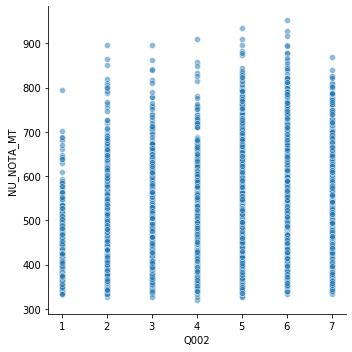

In [287]:
sns.relplot(x='Q002',y='NU_NOTA_MT',data=df, kind='scatter',alpha=0.5)
plt.show()

### Renda

In [288]:
df['Q006']=df['Q006'].map({'A':0,
                           'B':1,
                           'C':2,
                           'D':3,
                           'E':4,
                           'F':5,
                           'G':6,
                           'H':7,
                           'I':8,
                          'J':9,
                          'K':10,
                          'L':11,
                          'M':12,
                          'N':13,
                          'O':14,
                          'P':15,
                          'Q':16})

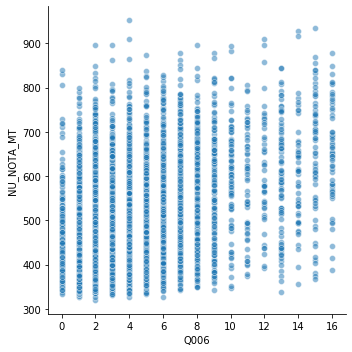

In [289]:
sns.relplot(x='Q006',y='NU_NOTA_MT',data=df, kind='scatter',alpha=0.5)
plt.show()

### Computador em casa

In [290]:
df['Q024']=df['Q024'].map({'A':0,
                           'B':1,
                           'C':2,
                           'D':3,
                           'E':4})

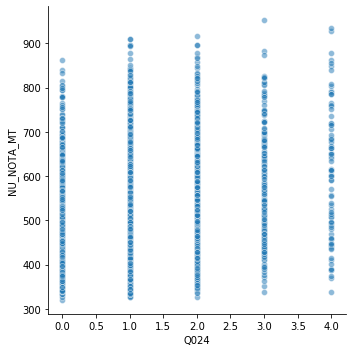

In [291]:
sns.relplot(x='Q024',y='NU_NOTA_MT',data=df, kind='scatter',alpha=0.5)
plt.show()

## Variáveis categóricas

In [292]:
colunas_treino = df.columns
colunas_treino 

Index(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q047', 'NU_NOTA_MT', 'anos_formacao'],
      dtype='object')

In [293]:
cat_features = ['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO','TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO','Q025', 'Q026', 'Q047']

In [294]:
df2 = pd.get_dummies(df,columns = cat_features).copy()

In [295]:
df2.head()

,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,NU_NOTA_MT,anos_formacao,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_Outros,TP_ESCOLA_Privada,IN_TREINEIRO_0,IN_TREINEIRO_1,IN_BAIXA_VISAO_0,IN_BAIXA_VISAO_1,IN_SURDEZ_0,IN_SURDEZ_1,TP_PRESENCA_CN_0,TP_PRESENCA_CN_1,TP_PRESENCA_CN_2,TP_PRESENCA_CH_0,TP_PRESENCA_CH_1,TP_PRESENCA_CH_2,TP_PRESENCA_LC_0,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,24,4,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,4,4,2,0,399.4,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,17,0,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,1,1,1,0,459.8,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,21,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,2,0,NaN,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,25,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5,4,2,NaN,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,28,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,2,0,NaN,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [296]:
df2.shape

(13680, 99)

# Dataset de teste

In [297]:
df_t = pd.read_csv('testfiles/test.csv')

In [298]:
df_t.shape

(4576, 47)

In [299]:
df_t.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [300]:
100*df_t[(df_t['NU_NOTA_CH'].isnull()==True)].shape[0]/df_t.shape[0]

24.78146853146853

In [301]:
100*df_t[(df_t['NU_NOTA_CN'].isnull()==True)].shape[0]/df_t.shape[0]

24.78146853146853

In [302]:
100*df_t[(df_t['NU_NOTA_LC'].isnull()==True)].shape[0]/df_t.shape[0]

26.201923076923077

In [303]:
print(df_t.columns)

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')


In [304]:
df_t['TP_PRESENCA_LC'].value_counts()

1    3377
0    1195
2       4
Name: TP_PRESENCA_LC, dtype: int64

In [305]:
# Para quem foi 0 (faltou à prova de LC) ou 2 (eliminado na prova), a nota de matemática é igual a NaN (ou zero)

In [306]:
df_t['TP_PRESENCA_CH'].value_counts()

1    3442
0    1134
Name: TP_PRESENCA_CH, dtype: int64

In [307]:
df_t['TP_PRESENCA_CN'].value_counts()

1    3442
0    1134
Name: TP_PRESENCA_CN, dtype: int64

In [308]:
df_t= df_t[['NU_INSCRICAO','SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q047']]

In [309]:
df_t.shape

(4576, 33)

## Substituição de Notas NaN por zero

In [310]:
df_t = df_t.fillna(value={'NU_NOTA_CN':0,'NU_NOTA_CH':0,'NU_NOTA_LC':0,
                     'NU_NOTA_COMP1':0, 'NU_NOTA_COMP2':0, 'NU_NOTA_COMP3':0,
                     'NU_NOTA_COMP4':0, 'NU_NOTA_COMP5':0, 'NU_NOTA_REDACAO':0})

## TP_ANO_CONCLUIU:


In [311]:
# Criação de nova coluna para indicar quantos anos a pessoa tem de formado

In [312]:
df_t.loc[(df_t.TP_ANO_CONCLUIU==0),'anos_formacao']=0
df_t.loc[(df_t.TP_ANO_CONCLUIU==1),'anos_formacao']=1
df_t.loc[(df_t.TP_ANO_CONCLUIU==2),'anos_formacao']=2
df_t.loc[(df_t.TP_ANO_CONCLUIU==3),'anos_formacao']=3
df_t.loc[(df_t.TP_ANO_CONCLUIU==4),'anos_formacao']=4
df_t.loc[(df_t.TP_ANO_CONCLUIU==5),'anos_formacao']=5
df_t.loc[(df_t.TP_ANO_CONCLUIU==6),'anos_formacao']=6
df_t.loc[(df_t.TP_ANO_CONCLUIU==7),'anos_formacao']=7
df_t.loc[(df_t.TP_ANO_CONCLUIU==8),'anos_formacao']=8
df_t.loc[(df_t.TP_ANO_CONCLUIU==9),'anos_formacao']=9
df_t.loc[(df_t.TP_ANO_CONCLUIU==10),'anos_formacao']=10


In [313]:
df_t.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_SURDEZ,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,anos_formacao
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,PR,22,F,3,1,1,5,1,0,0,0,1,1,1,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,A,5.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,MA,26,F,3,1,1,8,1,0,0,0,1,1,1,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,A,8.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,CE,21,M,1,1,2,0,2,0,0,0,1,1,1,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,A,0.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,PA,27,F,3,1,1,8,1,0,0,0,0,0,0,0.0,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,H,E,G,B,B,A,A,8.0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,PR,18,M,1,1,2,0,2,0,0,0,1,1,1,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,A,0.0


### Escola privada x não privada

In [314]:
df_t['TP_ESCOLA']=df_t['TP_ESCOLA'].map({1: 'Outros', 
                                           2: 'Outros',
                                           3: 'Privada',
                                           4: 'Outros'})

In [315]:
df_t['TP_ESCOLA'].value_counts()

Outros     4369
Privada     207
Name: TP_ESCOLA, dtype: int64

### Ano de estudo do pai

In [316]:
# Substitui a categoria H (não sei) pela categoria mais frequente B. Alterei as letras por números.

In [317]:
df_t['Q001']=df_t['Q001'].map({'A':1,
                           'B':2,
                           'C':3,
                           'D':4,
                           'E':5,
                           'F':6,
                           'G':7,
                           'H':2})

### Ano de estudo da mãe

In [318]:
# Substitui a categoria H (não sei) pela categoria mais frequente B. Alterei as letras por números.

In [319]:
df_t['Q002']=df_t['Q002'].map({'A':1,
                           'B':2,
                           'C':3,
                           'D':4,
                           'E':5,
                           'F':6,
                           'G':7,
                           'H':2})

### Renda

In [320]:
df_t['Q006']=df_t['Q006'].map({'A':0,
                           'B':1,
                           'C':2,
                           'D':3,
                           'E':4,
                           'F':5,
                           'G':6,
                           'H':7,
                           'I':8,
                          'J':9,
                          'K':10,
                          'L':11,
                          'M':12,
                          'N':13,
                          'O':14,
                          'P':15,
                          'Q':16})

### Computador em casa

In [321]:
df_t['Q024']=df_t['Q024'].map({'A':0,
                           'B':1,
                           'C':2,
                           'D':3,
                           'E':4})

## Dummies para variáveis categóricas

In [322]:
df_t1 = pd.get_dummies(df_t,columns = cat_features).copy()

In [323]:
df_t1.shape

(4576, 97)

In [324]:
df_t1.head()

,NU_INSCRICAO,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,anos_formacao,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_Outros,TP_ESCOLA_Privada,IN_TREINEIRO_0,IN_TREINEIRO_1,IN_BAIXA_VISAO_0,IN_BAIXA_VISAO_1,IN_SURDEZ_0,IN_SURDEZ_1,TP_PRESENCA_CN_0,TP_PRESENCA_CN_1,TP_PRESENCA_CH_0,TP_PRESENCA_CH_1,TP_PRESENCA_LC_0,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,5,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0,2,1,2,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,8,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0,5,2,2,1,8.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,21,0,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0,5,5,3,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,27,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5,6,1,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,18,0,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0,4,2,7,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0


In [325]:
df2.head()

,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,NU_NOTA_MT,anos_formacao,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_Outros,TP_ESCOLA_Privada,IN_TREINEIRO_0,IN_TREINEIRO_1,IN_BAIXA_VISAO_0,IN_BAIXA_VISAO_1,IN_SURDEZ_0,IN_SURDEZ_1,TP_PRESENCA_CN_0,TP_PRESENCA_CN_1,TP_PRESENCA_CN_2,TP_PRESENCA_CH_0,TP_PRESENCA_CH_1,TP_PRESENCA_CH_2,TP_PRESENCA_LC_0,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,24,4,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,4,4,2,0,399.4,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,17,0,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,1,1,1,0,459.8,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,21,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,2,0,NaN,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,25,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5,4,2,NaN,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,28,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,2,0,NaN,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [326]:
colunas_df_t1 = list(df_t1.columns)
colunas_df2 = list(df2.columns)

In [327]:
for i in colunas_df2:
    if i not in colunas_df_t1:
        print(i)

NU_NOTA_MT
TP_PRESENCA_CN_2
TP_PRESENCA_CH_2


In [328]:
df2=df2.drop(columns=['TP_PRESENCA_CN_2','TP_PRESENCA_CH_2'])

In [329]:
# Para as colunas categóricas, também posso excluir algumas colunas

In [330]:
colunas_df2

['NU_IDADE',
 'TP_ANO_CONCLUIU',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'NU_NOTA_MT',
 'anos_formacao',
 'SG_UF_RESIDENCIA_AC',
 'SG_UF_RESIDENCIA_AL',
 'SG_UF_RESIDENCIA_AM',
 'SG_UF_RESIDENCIA_AP',
 'SG_UF_RESIDENCIA_BA',
 'SG_UF_RESIDENCIA_CE',
 'SG_UF_RESIDENCIA_DF',
 'SG_UF_RESIDENCIA_ES',
 'SG_UF_RESIDENCIA_GO',
 'SG_UF_RESIDENCIA_MA',
 'SG_UF_RESIDENCIA_MG',
 'SG_UF_RESIDENCIA_MS',
 'SG_UF_RESIDENCIA_MT',
 'SG_UF_RESIDENCIA_PA',
 'SG_UF_RESIDENCIA_PB',
 'SG_UF_RESIDENCIA_PE',
 'SG_UF_RESIDENCIA_PI',
 'SG_UF_RESIDENCIA_PR',
 'SG_UF_RESIDENCIA_RJ',
 'SG_UF_RESIDENCIA_RN',
 'SG_UF_RESIDENCIA_RO',
 'SG_UF_RESIDENCIA_RR',
 'SG_UF_RESIDENCIA_RS',
 'SG_UF_RESIDENCIA_SC',
 'SG_UF_RESIDENCIA_SE',
 'SG_UF_RESIDENCIA_SP',
 'SG_UF_RESIDENCIA_TO',
 'TP_SEXO_F',
 'TP_SEXO_M',
 'TP_COR_RACA_0',
 'TP_COR_RACA_1',
 'TP_COR_RACA_2',
 'TP_COR_RACA

In [331]:
excluir =[ 'SG_UF_RESIDENCIA_AC','TP_SEXO_F','TP_COR_RACA_0','TP_NACIONALIDADE_0','TP_ST_CONCLUSAO_4',
         'TP_ESCOLA_Outros','IN_TREINEIRO_0','IN_BAIXA_VISAO_0','IN_SURDEZ_0','TP_PRESENCA_CN_0',
         'TP_PRESENCA_CH_0','TP_PRESENCA_LC_0','TP_LINGUA_1','TP_STATUS_REDACAO_1.0','Q025_A', 'Q026_A']

In [332]:
df2=df2.drop(columns=excluir)

In [333]:
df2.head()

,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,NU_NOTA_MT,anos_formacao,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ESCOLA_Privada,IN_TREINEIRO_1,IN_BAIXA_VISAO_1,IN_SURDEZ_1,TP_PRESENCA_CN_1,TP_PRESENCA_CH_1,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q025_B,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,24,4,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,4,4,2,0,399.4,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,17,0,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,1,1,1,0,459.8,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,21,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,2,0,NaN,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,25,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5,4,2,NaN,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,28,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,2,0,NaN,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [334]:
df2.shape[1]

81

In [335]:
df_t1=df_t1.drop(columns=excluir)
df_t1.head()

,NU_INSCRICAO,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,anos_formacao,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ESCOLA_Privada,IN_TREINEIRO_1,IN_BAIXA_VISAO_1,IN_SURDEZ_1,TP_PRESENCA_CN_1,TP_PRESENCA_CH_1,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q025_B,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,5,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0,2,1,2,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,8,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0,5,2,2,1,8.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,21,0,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0,5,5,3,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,27,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5,6,1,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,18,0,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0,4,2,7,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [336]:
df_t1.shape[1]

81

In [337]:
df2.isnull().sum()

NU_IDADE                    0
TP_ANO_CONCLUIU             0
NU_NOTA_CN                  0
NU_NOTA_CH                  0
NU_NOTA_LC                  0
NU_NOTA_COMP1               0
NU_NOTA_COMP2               0
NU_NOTA_COMP3               0
NU_NOTA_COMP4               0
NU_NOTA_COMP5               0
NU_NOTA_REDACAO             0
Q001                        0
Q002                        0
Q006                        0
Q024                        0
NU_NOTA_MT               3596
anos_formacao               0
SG_UF_RESIDENCIA_AL         0
SG_UF_RESIDENCIA_AM         0
SG_UF_RESIDENCIA_AP         0
SG_UF_RESIDENCIA_BA         0
SG_UF_RESIDENCIA_CE         0
SG_UF_RESIDENCIA_DF         0
SG_UF_RESIDENCIA_ES         0
SG_UF_RESIDENCIA_GO         0
SG_UF_RESIDENCIA_MA         0
SG_UF_RESIDENCIA_MG         0
SG_UF_RESIDENCIA_MS         0
SG_UF_RESIDENCIA_MT         0
SG_UF_RESIDENCIA_PA         0
SG_UF_RESIDENCIA_PB         0
SG_UF_RESIDENCIA_PE         0
SG_UF_RESIDENCIA_PI         0
SG_UF_RESI

In [338]:
df_t1.isnull().sum()

NU_INSCRICAO             0
NU_IDADE                 0
TP_ANO_CONCLUIU          0
NU_NOTA_CN               0
NU_NOTA_CH               0
NU_NOTA_LC               0
NU_NOTA_COMP1            0
NU_NOTA_COMP2            0
NU_NOTA_COMP3            0
NU_NOTA_COMP4            0
NU_NOTA_COMP5            0
NU_NOTA_REDACAO          0
Q001                     0
Q002                     0
Q006                     0
Q024                     0
anos_formacao            0
SG_UF_RESIDENCIA_AL      0
SG_UF_RESIDENCIA_AM      0
SG_UF_RESIDENCIA_AP      0
SG_UF_RESIDENCIA_BA      0
SG_UF_RESIDENCIA_CE      0
SG_UF_RESIDENCIA_DF      0
SG_UF_RESIDENCIA_ES      0
SG_UF_RESIDENCIA_GO      0
SG_UF_RESIDENCIA_MA      0
SG_UF_RESIDENCIA_MG      0
SG_UF_RESIDENCIA_MS      0
SG_UF_RESIDENCIA_MT      0
SG_UF_RESIDENCIA_PA      0
SG_UF_RESIDENCIA_PB      0
SG_UF_RESIDENCIA_PE      0
SG_UF_RESIDENCIA_PI      0
SG_UF_RESIDENCIA_PR      0
SG_UF_RESIDENCIA_RJ      0
SG_UF_RESIDENCIA_RN      0
SG_UF_RESIDENCIA_RO      0
S

In [339]:
df2 = df2.fillna(value={'NU_NOTA_MT':0})

In [340]:
df2.isnull().sum()

NU_IDADE                 0
TP_ANO_CONCLUIU          0
NU_NOTA_CN               0
NU_NOTA_CH               0
NU_NOTA_LC               0
NU_NOTA_COMP1            0
NU_NOTA_COMP2            0
NU_NOTA_COMP3            0
NU_NOTA_COMP4            0
NU_NOTA_COMP5            0
NU_NOTA_REDACAO          0
Q001                     0
Q002                     0
Q006                     0
Q024                     0
NU_NOTA_MT               0
anos_formacao            0
SG_UF_RESIDENCIA_AL      0
SG_UF_RESIDENCIA_AM      0
SG_UF_RESIDENCIA_AP      0
SG_UF_RESIDENCIA_BA      0
SG_UF_RESIDENCIA_CE      0
SG_UF_RESIDENCIA_DF      0
SG_UF_RESIDENCIA_ES      0
SG_UF_RESIDENCIA_GO      0
SG_UF_RESIDENCIA_MA      0
SG_UF_RESIDENCIA_MG      0
SG_UF_RESIDENCIA_MS      0
SG_UF_RESIDENCIA_MT      0
SG_UF_RESIDENCIA_PA      0
SG_UF_RESIDENCIA_PB      0
SG_UF_RESIDENCIA_PE      0
SG_UF_RESIDENCIA_PI      0
SG_UF_RESIDENCIA_PR      0
SG_UF_RESIDENCIA_RJ      0
SG_UF_RESIDENCIA_RN      0
SG_UF_RESIDENCIA_RO      0
S

## Train test split

In [341]:
X = df2.drop(columns =['NU_NOTA_MT'], axis=1)

In [342]:
X.head()

,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,anos_formacao,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ESCOLA_Privada,IN_TREINEIRO_1,IN_BAIXA_VISAO_1,IN_SURDEZ_1,TP_PRESENCA_CN_1,TP_PRESENCA_CH_1,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q025_B,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,24,4,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,4,4,2,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,17,0,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,1,1,1,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,21,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,2,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,25,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5,4,2,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,28,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,2,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [343]:
y = df2['NU_NOTA_MT']

In [344]:
y.head()

0    399.4
1    459.8
2      0.0
3      0.0
4      0.0
Name: NU_NOTA_MT, dtype: float64

In [345]:
from sklearn.model_selection import train_test_split

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Aplicação do modelo

In [347]:
from sklearn.linear_model import LinearRegression

In [348]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)

In [349]:
from sklearn.metrics import mean_squared_error, r2_score

In [350]:
mean_squared_error(y_test, y_pred_lr)

4174.004663174104

In [351]:
y_test

13653    453.4
1605     443.1
4982     340.4
11017    594.0
2478     465.9
2762     487.8
7692       0.0
12190    348.1
9905       0.0
8565     369.0
3521     417.4
3540     453.3
1658     508.7
3440     580.6
9150       0.0
1486     424.4
6214     447.7
11587    407.3
5061       0.0
9987       0.0
1331     377.6
10969    374.9
9304     411.4
8707       0.0
4917     696.9
11984    372.0
10933    410.0
11473    733.2
11410    471.2
12938    446.2
7020       0.0
5093       0.0
10091    379.5
3432     497.2
1803     565.5
13363    394.8
11133    514.0
7335       0.0
864      449.1
12461    487.2
5290     462.3
13684    480.3
7655     361.0
12493    518.2
1663     676.4
2562     471.1
4683       0.0
102      380.7
5905     350.6
9726     372.9
4807     600.3
2359     500.3
8560     498.7
13716      0.0
902      353.4
6661     510.3
2235     738.8
9906     340.0
13376    457.3
8115       0.0
1485       0.0
7640     451.7
5614       0.0
11036    424.4
7197     413.5
6797     484.9
10231    3

In [352]:
y_pred_lr

array([524.86513197, 523.68450624, 392.69820684, ...,   2.95934975,
       476.37585503, 457.84792095])

In [ ]:
## Aplicando o modelo no dataset de teste

In [353]:
df_t1.head()

,NU_INSCRICAO,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,anos_formacao,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ESCOLA_Privada,IN_TREINEIRO_1,IN_BAIXA_VISAO_1,IN_SURDEZ_1,TP_PRESENCA_CN_1,TP_PRESENCA_CH_1,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q025_B,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,5,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0,2,1,2,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,8,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0,5,2,2,1,8.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,21,0,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0,5,5,3,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,27,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5,6,1,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,18,0,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0,4,2,7,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [356]:
X_sub= df_t1.drop(columns =['NU_INSCRICAO'], axis=1)

In [357]:
y_pred = model_lr.predict(X_sub)

In [358]:
df_t1['NU_NOTA_MT']=y_pred

In [361]:
df_t1[df_t1['TP_PRESENCA_LC_1']==0]['NU_NOTA_MT']

3        -0.791016
10       -3.092109
11       -3.489549
16        1.906891
17       -1.403831
18        0.798701
21       79.121778
22      -13.179504
29       19.387767
30      -29.951365
44      -17.897080
50       50.277823
51       23.184722
59        5.148122
61        7.978567
62      -11.215586
63      -15.339879
64      -16.080517
69        0.913901
70        5.812235
74       -7.560302
81      -12.699801
86        1.380583
99       13.031450
109       4.871675
111     -13.879618
112      -1.914210
114      17.618796
116      70.438429
118     -13.930780
122     -29.049974
125      21.708646
131      12.046573
132       7.613715
134     -12.399446
137      20.280263
140      13.451201
149      22.209650
153       8.897233
162      -7.989052
163      14.724444
166      10.455797
168     -19.654385
171      -8.240510
174       3.352432
175     -16.426331
177      13.056060
183      14.500071
188     -15.544441
196       8.757776
201       6.230513
203       5.397884
205      21.

In [366]:
nota_matematica = []
for i in range (df_t1.shape[0]):
    if df_t1['TP_PRESENCA_LC_1'][i]==0:
        nota=None
    else:
        nota= y_pred[i]
    nota_matematica.append(nota)

In [367]:
nota_matematica

[433.19165432453156,
 430.2144557237625,
 579.2227935791016,
 None,
 549.7979153394699,
 482.30231165885925,
 568.2071534991264,
 421.9165708422661,
 459.9520705342293,
 455.24320870637894,
 None,
 None,
 453.94842487573624,
 567.954326748848,
 539.8539591431618,
 463.36068922281265,
 None,
 None,
 None,
 380.9744517803192,
 428.6868870854378,
 None,
 None,
 478.8110041022301,
 631.029257953167,
 435.85524517297745,
 608.1166858077049,
 396.96618950366974,
 474.4918383359909,
 None,
 None,
 431.6972569823265,
 552.1086478233337,
 491.0123705267906,
 538.8304175138474,
 499.70302778482437,
 472.6215016245842,
 439.62857335805893,
 432.3533051609993,
 567.3678130507469,
 479.936967253685,
 449.5264450907707,
 513.7168150544167,
 459.32797133922577,
 None,
 441.3844625353813,
 512.0576493740082,
 504.5095792412758,
 539.8409503698349,
 458.19774413108826,
 None,
 None,
 431.5346570611,
 578.6366664767265,
 488.2455105781555,
 475.3717488050461,
 475.01801711320877,
 400.4843637943268,
 44

In [368]:
df_t1['NU_NOTA_MT']=nota_matematica

In [369]:
df_t1['NU_NOTA_MT'][0:10]

0    433.191654
1    430.214456
2    579.222794
3           NaN
4    549.797915
5    482.302312
6    568.207153
7    421.916571
8    459.952071
9    455.243209
Name: NU_NOTA_MT, dtype: float64

In [370]:
df_t1.head()

,NU_INSCRICAO,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,anos_formacao,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ESCOLA_Privada,IN_TREINEIRO_1,IN_BAIXA_VISAO_1,IN_SURDEZ_1,TP_PRESENCA_CN_1,TP_PRESENCA_CH_1,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q025_B,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,5,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0,2,1,2,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,433.191654
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,8,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0,5,2,2,1,8.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,430.214456
2,b38a03232f43b11c9d0788abaf060f7366053b6d,21,0,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0,5,5,3,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,579.222794
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,27,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5,6,1,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,18,0,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0,4,2,7,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,549.797915


In [371]:
answer = df_t1[['NU_INSCRICAO','NU_NOTA_MT']]

In [372]:
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,433.191654
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,430.214456
2,b38a03232f43b11c9d0788abaf060f7366053b6d,579.222794
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,549.797915


In [373]:
answer.to_csv("answer.csv",index=False)

In [ ]:
# Score após submissão:93,5977%